<a href="https://colab.research.google.com/github/FarrelAD/Tim-Maju-Lancar-Datathon-Jatim-2025/blob/dev%2Fcakra/notebooks/KerangkaAnalisis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import numpy as np
import pandas as pd # Ensure pandas is imported
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from google.colab import files # Import the files module

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving jatim-excel.xlsx to jatim-excel (3).xlsx
User uploaded file "jatim-excel (3).xlsx" with length 157583 bytes


In [27]:
df = pd.read_excel(list(uploaded.keys())[0])
display(df.head(100))

,kabupaten/kota,kecamatan,sekolah,rombel,sekolah_id,npsn,bentuk_pendidikan,status_sekolah,akreditasi,guru_kelas,...,before_tempat_bermain_olahraga,after_tempat_bermain_olahraga,before_ruang_tu,after_ruang_tu,before_ruang_konseling,after_ruang_konseling,before_ruang_osis,after_ruang_osis,before_bangunan,after_bangunan
0,Kab. Bangkalan,Kec. Bangkalan,SLB SAMUDRA LAVENDER,13,58B659F8-2673-4B66-ADC9-0995AFA0E80E,69830686,SLB,Swasta,B,13,...,0,0,0,0,0,0,0,0,2,2
1,Kab. Bangkalan,Kec. Kamal,SLB PGRI,11,4028497E-8D18-E111-8F7E-F5091768A769,20531143,SLB,Swasta,B,6,...,0,0,0,0,0,0,0,0,3,3
2,Kab. Bangkalan,Kec. Socah,SLB NEGERI KELEYAN BANGKALAN,33,60CF4B7E-8D18-E111-A61E-3BDB8AFFE3B0,20531387,SLB,Negeri,B,21,...,0,0,1,1,0,0,0,0,6,6
3,Kab. Bangkalan,Kec. Tragah,SLB SAMUDRA TERRA ATHENA,6,C28A7F37-6226-475E-B414-42822EFD4E03,70027553,SLB,Swasta,B,6,...,1,1,0,0,0,0,0,0,5,5
4,Kab. Banyuwangi,Kec. Bangorejo,SLB PGRI BANGOREJO,13,F709E309-7266-4D2D-9BB0-F11BAB758EDE,69861080,SLB,Swasta,C,9,...,0,0,0,0,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Kab. Jombang,Kec. Gudo,SLB SUNAR AJI,12,9B749798-150E-4C7C-8B7F-51AB139ED6AC,69984103,SLB,Swasta,C,3,...,0,0,0,0,0,0,0,0,8,8
96,Kab. Jombang,Kec. Jogoroto,SLB DARUL ULUM,12,6076DCF5-8B18-E111-8B56-1F9EFE82BDE6,20503606,SLB,Swasta,A,7,...,1,1,0,0,0,0,0,0,1,1
97,Kab. Jombang,Kec. Jombang,SLB MUHAMMADIYAH,26,NaN,20503224,SLB,Negeri,NaN,10,...,0,0,2,2,1,1,0,0,17,17
98,Kab. Jombang,Kec. Jombang,SLB NEGERI JOMBANG,24,F034FBF2-8B18-E111-8FFD-8B630529F9BF,20503224,SLB,Negeri,B,12,...,0,0,1,1,0,0,0,0,8,8


#Compare Quantity Swasta vs Negeri

In [28]:
print("\n=== Jumlah dan Proporsi Sekolah Negeri vs Swasta ===")
status_counts = df['status_sekolah'].value_counts()
status_proportions = df['status_sekolah'].value_counts(normalize=True) * 100

status_summary = pd.DataFrame({
    'Count': status_counts,
    'Proportion (%)': status_proportions.map('{:.2f}%'.format)
})
display(status_summary)


=== Jumlah dan Proporsi Sekolah Negeri vs Swasta ===


,Count,Proportion (%)
status_sekolah,,
Swasta,297,75.77%
Negeri,95,24.23%


#Data Understanding & Preprocessing

In [29]:
# Filter data for Negeri status only
df_negeri = df[df['status_sekolah'] == 'Negeri'].copy()

# 1. Cek missing values for Negeri schools
missing_values_negeri = df_negeri.isnull().sum()
print("=== Missing Values Per Column (Negeri Schools) ===")
print(missing_values_negeri.to_string())
print("\n=== Missing Values di Kolom 'akreditasi' (Negeri Schools) ===")
print(missing_values_negeri['akreditasi'])

=== Missing Values Per Column (Negeri Schools) ===
kabupaten/kota                    0
kecamatan                         0
sekolah                           0
rombel                            0
sekolah_id                        4
npsn                              0
bentuk_pendidikan                 0
status_sekolah                    0
akreditasi                        4
guru_kelas                        0
guru_matematika                   0
guru_bahasa_indonesia             0
guru_bahasa_inggris               0
guru_sejarah_indonesia            0
guru_pkn                          0
guru_penjaskes                    0
guru_agama_budi_pekerti           0
guru_seni_budaya                  0
ptk_laki                          0
ptk_perempuan                     0
pegawai_laki                      0
pegawai_perempuan                 0
pd_kelas_1_laki                   0
pd_kelas_1_perempuan              0
pd_kelas_2_laki                   0
pd_kelas_2_perempuan              0
pd_kelas_3_la

In [30]:
# 2. Normalisasi teks kabupaten/kota & kecamatan
df['kabupaten/kota'] = df['kabupaten/kota'].str.lower().str.strip()

In [31]:
# 3. Rasio guru per siswa

# Calculate teacher-student ratio
df_negeri['teacher_student_ratio'] = df_negeri['ptk'] / df_negeri['pd']

# Handle potential NaN or infinite values in 'teacher_student_ratio'
# Replace infinite values with NaN
df_negeri['teacher_student_ratio'] = df_negeri['teacher_student_ratio'].replace([np.inf, -np.inf], np.nan)
# Fill NaN values with the mean of the column (or another appropriate strategy)
df_negeri['teacher_student_ratio'].fillna(df_negeri['teacher_student_ratio'].mean(), inplace=True)


print("\n=== Rasio Guru per Siswa per Sekolah (Sorted - Negeri Schools) ===")
# Group by sekolah and select the calculated ratio, then sort
teacher_student_ratio_sekolah_sorted = df_negeri.groupby('sekolah')[['ptk', 'pd', 'teacher_student_ratio']].first().reset_index() # Using first() as no aggregation is requested
teacher_student_ratio_sekolah_sorted = teacher_student_ratio_sekolah_sorted.sort_values(by='teacher_student_ratio', ascending=False)
display(teacher_student_ratio_sekolah_sorted)


=== Rasio Guru per Siswa per Sekolah (Sorted - Negeri Schools) ===


/tmp/ipython-input-3380250764.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_negeri['teacher_student_ratio'].fillna(df_negeri['teacher_student_ratio'].mean(), inplace=True)


,sekolah,ptk,pd,teacher_student_ratio
0,SDLB ABCD PGRI 3 CLURING,4,1,4.000000
92,SMALBS BHAKTI PERTIWI,5,13,0.384615
54,SLB NEGERI KELEYAN BANGKALAN,19,50,0.380000
8,SLB AISYIYAH PORONG SIDOARJO,9,24,0.375000
62,SLB NEGERI SAMBIREJO NGANJUK,21,56,0.375000
...,...,...,...,...
12,SLB BERANDA ISTIMEWA GRUDO,6,63,0.095238
25,SLB NEGERI,11,121,0.090909
65,SLB NEGERI SENGON AGUNG PURWOSARI KABUPATEN PA...,7,78,0.089744
3,SLB PGRI 3 CLURING,5,88,0.056818


In [32]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Filter data for Negeri status only
df_negeri = df[df['status_sekolah'] == 'Negeri'].copy()

# 1. Calculate modified teacher-student ratio (1 ptk : 8 pd)
# This interpretation seems to be a target ratio, not a calculation from the data.
# Let's calculate the actual teacher-student ratio and then potentially compare it to 1:8 later.
df_negeri['teacher_student_ratio'] = df_negeri['ptk'] / df_negeri['pd']

# Handle potential NaN or infinite values in 'teacher_student_ratio'
df_negeri['teacher_student_ratio'] = df_negeri['teacher_student_ratio'].replace([np.inf, -np.inf], np.nan)
df_negeri['teacher_student_ratio'].fillna(df_negeri['teacher_student_ratio'].mean(), inplace=True)

# Group by kabupaten/kota and calculate the mean teacher-student ratio
print("\n=== Rata-rata Rasio Guru per Siswa per Kabupaten/Kota (Negeri Schools) ===")
teacher_student_ratio_district = df_negeri.groupby('kabupaten/kota')['teacher_student_ratio'].mean().reset_index()
display(teacher_student_ratio_district.head())


# 2. Calculate normalized infrastructure index using only 'after' columns
after_infrastructure_cols = [col for col in df_negeri.columns if 'after_' in col and ('ruang' in col or 'laboratorium' in col or 'perpustakaan' in col or 'bangunan' in col)]

df_negeri['after_infrastructure_index'] = df_negeri[after_infrastructure_cols].sum(axis=1)

# Calculate the maximum current infrastructure index
max_infrastructure_index = df_negeri['after_infrastructure_index'].max()

# Handle the case where max_infrastructure_index is zero to avoid division by zero
if max_infrastructure_index > 0:
    df_negeri['normalized_infrastructure_index'] = df_negeri['after_infrastructure_index'] / max_infrastructure_index
else:
    df_negeri['normalized_infrastructure_index'] = 0 # Or handle as appropriate


print("\n=== Indeks Infrastruktur Ternormalisasi (sample - Negeri Schools) ===")
display(df_negeri[['sekolah', 'after_infrastructure_index', 'normalized_infrastructure_index']].head())


# 3. Clustering with the two new features grouped by kabupaten/kota
# First, calculate the mean of the features per district/city
features_for_clustering = ['teacher_student_ratio', 'normalized_infrastructure_index']
df_negeri_grouped = df_negeri.groupby('kabupaten/kota')[features_for_clustering].mean().reset_index()


X_clustering = df_negeri_grouped[features_for_clustering].copy()

# Handle potential NaN values before scaling and clustering
X_clustering.fillna(X_clustering.mean(), inplace=True)


# Standardize the data
scaler = StandardScaler()
X_scaled_clustering = scaler.fit_transform(X_clustering)

# Determine the optimal number of clusters (e.g., using the Elbow method or prior knowledge)
# Let's choose a range of cluster numbers to evaluate with Silhouette score
range_n_clusters = range(2, 11) # Evaluate from 2 to 10 clusters

silhouette_scores = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_scaled_clustering)
    silhouette_avg = silhouette_score(X_scaled_clustering, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, the average silhouette_score is : {silhouette_avg:.2f}")

# Find the number of clusters with the highest silhouette score
optimal_n_clusters = range_n_clusters[silhouette_scores.index(max(silhouette_scores))]
print(f"\nOptimal number of clusters based on Silhouette Score: {optimal_n_clusters}")

# Apply K-Means clustering with the optimal number of clusters
kmeans_optimal = KMeans(n_clusters=optimal_n_clusters, random_state=42, n_init=10)
df_negeri_grouped['cluster'] = kmeans_optimal.fit_predict(X_scaled_clustering)

print(f"\n=== Cluster Analysis with {optimal_n_clusters} Clusters (Negeri Schools - Grouped by District/City) ===")
cluster_summary = df_negeri_grouped.groupby('cluster')[features_for_clustering].mean()
display(cluster_summary)

# Display the grouped data with their assigned cluster
print("\n=== Districts/Cities with Cluster Assignments (Negeri Schools) ===")
display(df_negeri_grouped[['kabupaten/kota', 'cluster'] + features_for_clustering].head())


=== Rata-rata Rasio Guru per Siswa per Kabupaten/Kota (Negeri Schools) ===


/tmp/ipython-input-3806199940.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_negeri['teacher_student_ratio'].fillna(df_negeri['teacher_student_ratio'].mean(), inplace=True)


,kabupaten/kota,teacher_student_ratio
0,kab. bangkalan,0.380000
1,kab. banyuwangi,1.012386
2,kab. blitar,0.210000
3,kab. bojonegoro,0.155243
4,kab. bondowoso,0.201645



=== Indeks Infrastruktur Ternormalisasi (sample - Negeri Schools) ===


,sekolah,after_infrastructure_index,normalized_infrastructure_index
2,SLB NEGERI KELEYAN BANGKALAN,17,0.207317
11,SDLB ABCD PGRI 3 CLURING,13,0.158537
12,SLB PGRI 3 CLURING,19,0.231707
13,SLB NEGERI TAMANAGUNG BANYUWANGI,35,0.426829
14,SMALBS BHAKTI PERTIWI,13,0.158537


For n_clusters = 2, the average silhouette_score is : 0.77
For n_clusters = 3, the average silhouette_score is : 0.70
For n_clusters = 4, the average silhouette_score is : 0.42
For n_clusters = 5, the average silhouette_score is : 0.45
For n_clusters = 6, the average silhouette_score is : 0.46
For n_clusters = 7, the average silhouette_score is : 0.42
For n_clusters = 8, the average silhouette_score is : 0.45
For n_clusters = 9, the average silhouette_score is : 0.41
For n_clusters = 10, the average silhouette_score is : 0.41

Optimal number of clusters based on Silhouette Score: 2

=== Cluster Analysis with 2 Clusters (Negeri Schools - Grouped by District/City) ===


,teacher_student_ratio,normalized_infrastructure_index
cluster,,
0,0.189250,0.311040
1,1.012386,0.241463



=== Districts/Cities with Cluster Assignments (Negeri Schools) ===


,kabupaten/kota,cluster,teacher_student_ratio,normalized_infrastructure_index
0,kab. bangkalan,0,0.380000,0.207317
1,kab. banyuwangi,1,1.012386,0.241463
2,kab. blitar,0,0.210000,0.451220
3,kab. bojonegoro,0,0.155243,0.214939
4,kab. bondowoso,0,0.201645,0.204878



=== Jumlah Sekolah per Status dan Akreditasi ===


akreditasi,A,B,Belum Akreditasi,C,Tidak Terakreditasi
status_sekolah,,,,,
Negeri,34,52,1,4,0
Swasta,28,196,7,58,1


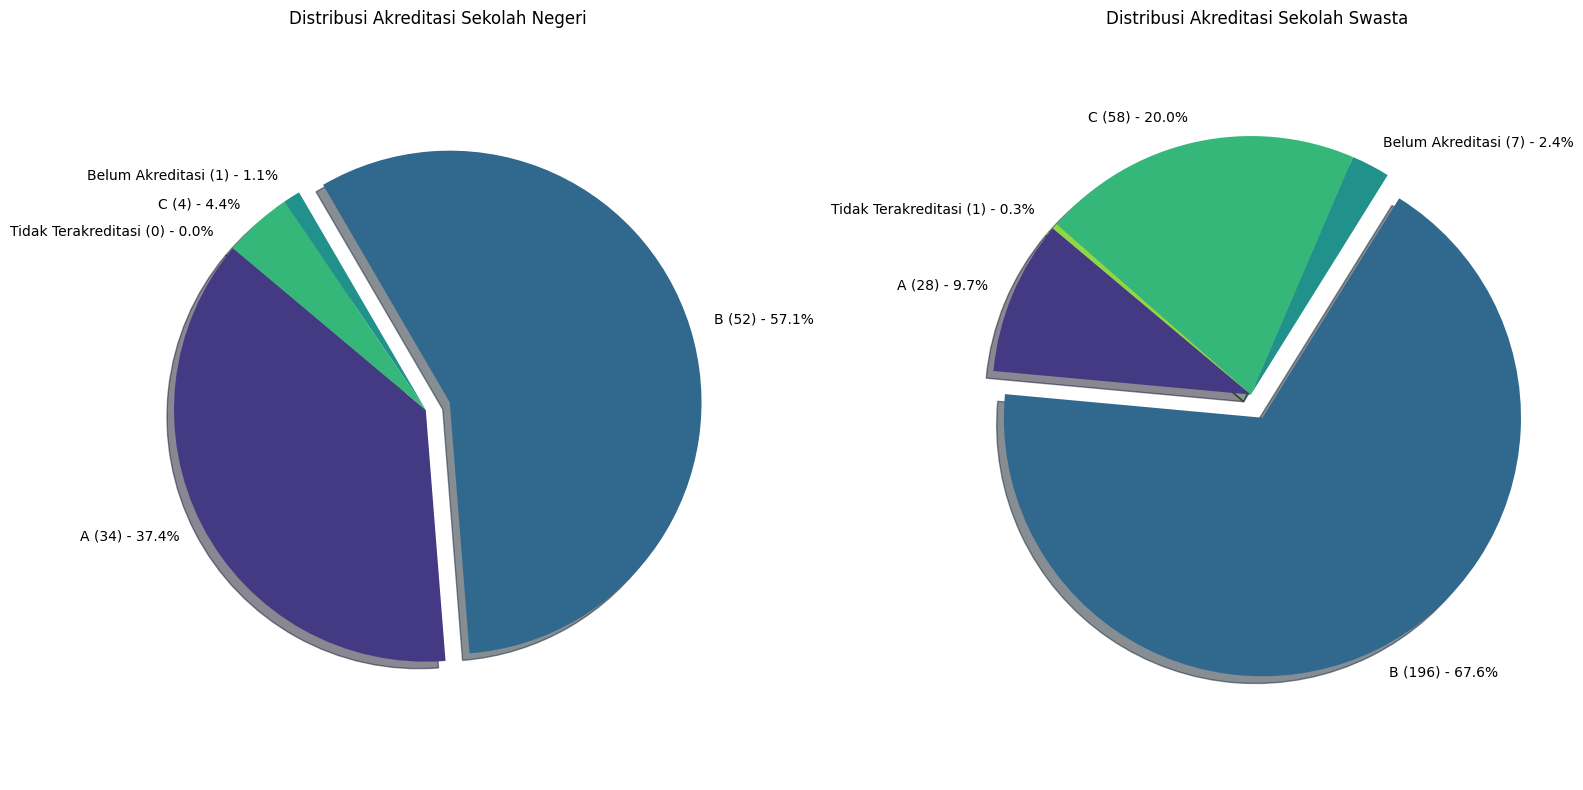

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count schools by status and accreditation
accreditation_counts = df.groupby(['status_sekolah', 'akreditasi']).size().unstack(fill_value=0)

print("\n=== Jumlah Sekolah per Status dan Akreditasi ===")
display(accreditation_counts)

# Visualize the comparison using pie charts side-by-side
fig, axes = plt.subplots(1, 2, figsize=(16, 8)) # Create a figure with 1 row and 2 columns of subplots

# Pie chart for Negeri schools
if 'Negeri' in accreditation_counts.index:
    negeri_counts = accreditation_counts.loc['Negeri']
    total_negeri = negeri_counts.sum()
    # Create custom labels with accreditation, count, and percentage
    negeri_labels = [f'{level} ({count}) - {count/total_negeri:.1%}' for level, count in negeri_counts.items()]

    # Add shadow and potentially explode a slice for visual appeal
    # Find the index of the largest slice to explode
    max_negeri_slice_index = negeri_counts.argmax()
    explode_negeri = [0] * len(negeri_counts)
    explode_negeri[max_negeri_slice_index] = 0.1 # Explode the largest slice

    axes[0].pie(negeri_counts, labels=negeri_labels, startangle=140, colors=sns.color_palette('viridis', len(negeri_counts)),
               pctdistance=0.85, labeldistance=1.1, shadow=True, explode=explode_negeri) # Add shadow and explode
    axes[0].set_title('Distribusi Akreditasi Sekolah Negeri')
    axes[0].axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
else:
    axes[0].text(0.5, 0.5, "Tidak ada data untuk sekolah Negeri.", horizontalalignment='center', verticalalignment='center')
    axes[0].set_title('Distribusi Akreditasi Sekolah Negeri')
    axes[0].axis('off') # Turn off axis for empty plot

# Pie chart for Swasta schools
if 'Swasta' in accreditation_counts.index:
    swasta_counts = accreditation_counts.loc['Swasta']
    total_swasta = swasta_counts.sum()
    # Create custom labels with accreditation, count, and percentage
    swasta_labels = [f'{level} ({count}) - {count/total_swasta:.1%}' for level, count in swasta_counts.items()]

    # Add shadow and potentially explode a slice for visual appeal
    # Find the index of the largest slice to explode
    max_swasta_slice_index = swasta_counts.argmax()
    explode_swasta = [0] * len(swasta_counts)
    explode_swasta[max_swasta_slice_index] = 0.1 # Explode the largest slice

    axes[1].pie(swasta_counts, labels=swasta_labels, startangle=140, colors=sns.color_palette('viridis', len(swasta_counts)),
               pctdistance=0.85, labeldistance=1.1, shadow=True, explode=explode_swasta) # Add shadow and explode
    axes[1].set_title('Distribusi Akreditasi Sekolah Swasta')
    axes[1].axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
else:
    axes[1].text(0.5, 0.5, "Tidak ada data untuk sekolah Swasta.", horizontalalignment='center', verticalalignment='center')
    axes[1].set_title('Distribusi Akreditasi Sekolah Swasta')
    axes[1].axis('off') # Turn off axis for empty plot


plt.tight_layout() # Adjust layout to prevent titles/labels overlapping
plt.show()

In [54]:
# Filter data for Negeri status only
df_negeri = df[df['status_sekolah'] == 'Negeri'].copy()

# Calculate the required number of classrooms based on 8 students per classroom
df_negeri['required_classrooms'] = df_negeri['pd'] / 8

# Compare required classrooms to actual classrooms
df_negeri['classroom_sufficiency'] = df_negeri['after_ruang_kelas'] - df_negeri['required_classrooms']

# Calculate the actual teacher-student ratio
df_negeri['teacher_student_ratio'] = df_negeri['ptk'] / df_negeri['pd']

# Handle potential NaN or infinite values in 'teacher_student_ratio'
df_negeri['teacher_student_ratio'] = df_negeri['teacher_student_ratio'].replace([np.inf, -np.inf], np.nan)
# Fill NaN values with the mean of the column (or another appropriate strategy)
df_negeri['teacher_student_ratio'].fillna(df_negeri['teacher_student_ratio'].mean(), inplace=True)


print("\n=== Analisis Kecukupan Ruang Kelas dan Rasio Guru per Siswa (Sekolah Negeri) ===")
print("Kecukupan Ruang Kelas: Nilai positif menunjukkan lebih banyak ruang kelas dari yang dibutuhkan (rasio 1:8 siswa), nilai negatif menunjukkan kekurangan.")
print("Rasio Guru per Siswa: Rasio aktual PTK (guru) per PD (siswa).")

# Display relevant columns including the new teacher-student ratio
display(df_negeri[['sekolah', 'pd', 'after_ruang_kelas', 'required_classrooms', 'classroom_sufficiency', 'ptk', 'teacher_student_ratio']])

# Further analysis could involve comparing the teacher-student ratio to the target of 1:8
# and potentially creating a combined metric or visualization.


=== Analisis Kecukupan Ruang Kelas dan Rasio Guru per Siswa (Sekolah Negeri) ===
Kecukupan Ruang Kelas: Nilai positif menunjukkan lebih banyak ruang kelas dari yang dibutuhkan (rasio 1:8 siswa), nilai negatif menunjukkan kekurangan.
Rasio Guru per Siswa: Rasio aktual PTK (guru) per PD (siswa).


/tmp/ipython-input-1768745667.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_negeri['teacher_student_ratio'].fillna(df_negeri['teacher_student_ratio'].mean(), inplace=True)


,sekolah,pd,after_ruang_kelas,required_classrooms,classroom_sufficiency,ptk,teacher_student_ratio
2,SLB NEGERI KELEYAN BANGKALAN,50,6,6.250,-0.250,19,0.380000
11,SDLB ABCD PGRI 3 CLURING,1,6,0.125,5.875,4,4.000000
12,SLB PGRI 3 CLURING,88,7,11.000,-4.000,5,0.056818
13,SLB NEGERI TAMANAGUNG BANYUWANGI,103,12,12.875,-0.875,31,0.300971
14,SMALBS BHAKTI PERTIWI,13,8,1.625,6.375,5,0.384615
...,...,...,...,...,...,...,...
333,SLB C AUTIS NEGERI KEDUNGKANDANG KOTA MALANG,158,24,19.750,4.250,20,0.126582
334,SLB YAYASAN PUTRA PANCASILA,79,13,9.875,3.125,11,0.139241
345,SLB ARYA SATYA HATI,60,13,7.500,5.500,12,0.200000
346,SLB NEGERI 1 KOTA PASURUAN,197,27,24.625,2.375,24,0.121827



=== Perbandingan Rata-rata Kecukupan Ruang Kelas dan Rasio Guru per Siswa (Negeri vs Swasta) ===


/tmp/ipython-input-2789157112.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['teacher_student_ratio'].fillna(df['teacher_student_ratio'].mean(), inplace=True)


,status_sekolah,classroom_sufficiency,teacher_student_ratio
0,Negeri,0.956579,0.229015
1,Swasta,1.728956,0.174129


/tmp/ipython-input-2789157112.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='status_sekolah', y='classroom_sufficiency', data=comparison_summary, ax=axes[0], palette='viridis')
/tmp/ipython-input-2789157112.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='status_sekolah', y='teacher_student_ratio', data=comparison_summary, ax=axes[1], palette='viridis')


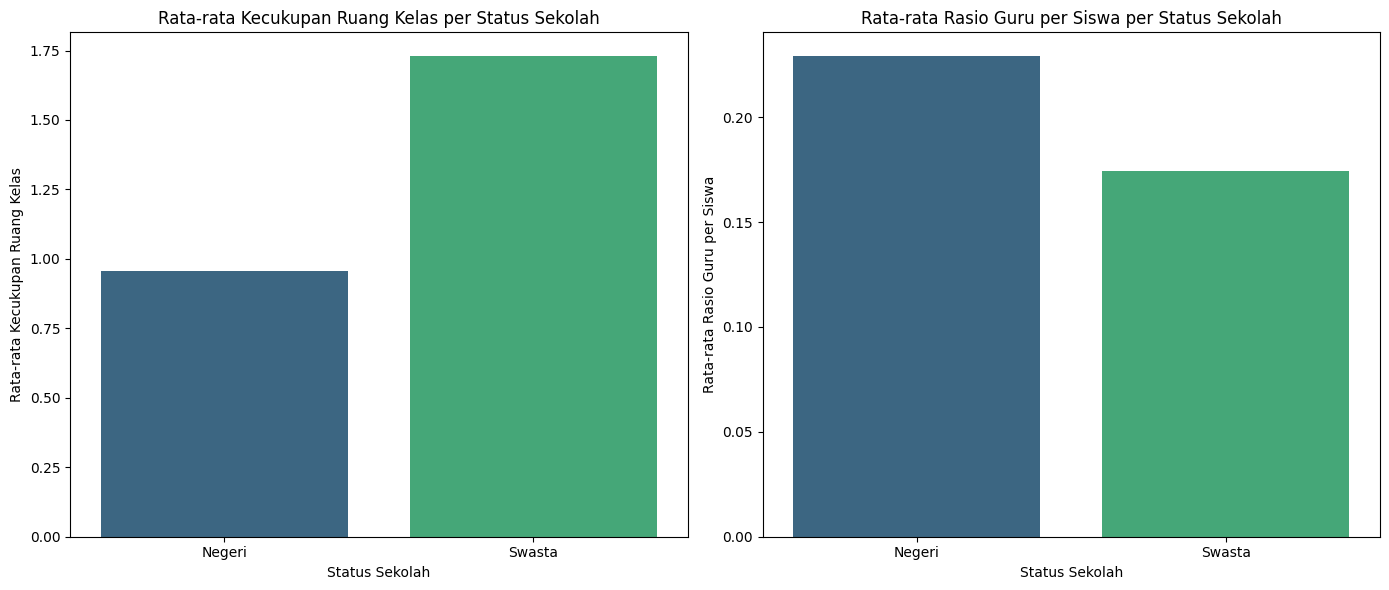


Detail perbandingan rata-rata dalam bentuk tabel:


,status_sekolah,classroom_sufficiency,teacher_student_ratio
0,Negeri,0.956579,0.229015
1,Swasta,1.728956,0.174129


In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate classroom sufficiency for all schools
df['required_classrooms'] = df['pd'] / 8
df['classroom_sufficiency'] = df['after_ruang_kelas'] - df['required_classrooms']

# Calculate the actual teacher-student ratio for all schools
df['teacher_student_ratio'] = df['ptk'] / df['pd']

# Handle potential NaN or infinite values in ratios
df['teacher_student_ratio'] = df['teacher_student_ratio'].replace([np.inf, -np.inf], np.nan)
# For simplicity, fill NaN values with the mean of the column (or another appropriate strategy)
df['teacher_student_ratio'].fillna(df['teacher_student_ratio'].mean(), inplace=True)


# Group by status_sekolah and calculate the mean of the metrics
comparison_summary = df.groupby('status_sekolah')[['classroom_sufficiency', 'teacher_student_ratio']].mean().reset_index()

print("\n=== Perbandingan Rata-rata Kecukupan Ruang Kelas dan Rasio Guru per Siswa (Negeri vs Swasta) ===")
display(comparison_summary) # Ensure the summary table is displayed

# Visualize the comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Bar plot for Classroom Sufficiency
sns.barplot(x='status_sekolah', y='classroom_sufficiency', data=comparison_summary, ax=axes[0], palette='viridis')
axes[0].set_title('Rata-rata Kecukupan Ruang Kelas per Status Sekolah')
axes[0].set_xlabel('Status Sekolah')
axes[0].set_ylabel('Rata-rata Kecukupan Ruang Kelas')

# Bar plot for Teacher-Student Ratio
sns.barplot(x='status_sekolah', y='teacher_student_ratio', data=comparison_summary, ax=axes[1], palette='viridis')
axes[1].set_title('Rata-rata Rasio Guru per Siswa per Status Sekolah')
axes[1].set_xlabel('Status Sekolah')
axes[1].set_ylabel('Rata-rata Rasio Guru per Siswa')

plt.tight_layout()
plt.show()

# Adding an explicit print statement after the plot to re-emphasize the table.
print("\nDetail perbandingan rata-rata dalam bentuk tabel:")
display(comparison_summary)

In [84]:
import pandas as pd
import numpy as np

# Calculate the required number of classrooms based on 8 students per classroom for all schools
df['required_classrooms'] = df['pd'] / 8

# Compare required classrooms to actual classrooms for all schools
df['classroom_sufficiency'] = df['after_ruang_kelas'] - df['required_classrooms']

# Calculate the actual teacher-student ratio for all schools
df['teacher_student_ratio'] = df['ptk'] / df['pd']

# Handle potential NaN or infinite values in 'teacher_student_ratio'
df['teacher_student_ratio'] = df['teacher_student_ratio'].replace([np.inf, -np.inf], np.nan)
# Fill NaN values with the mean of the column (or another appropriate strategy)
df['teacher_student_ratio'].fillna(df['teacher_student_ratio'].mean(), inplace=True)


print("\n=== Analisis Kecukupan Ruang Kelas dan Rasio Guru per Siswa (Semua Sekolah) ===")
print("Kecukupan Ruang Kelas: Nilai positif menunjukkan lebih banyak ruang kelas dari yang dibutuhkan (rasio 1:8 siswa), nilai negatif menunjukkan kekurangan.")
print("Rasio Guru per Siswa: Rasio aktual PTK (guru) per PD (siswa).")

# Select relevant columns
analysis_cols = ['sekolah', 'pd', 'after_ruang_kelas', 'required_classrooms', 'classroom_sufficiency', 'ptk', 'teacher_student_ratio']

# Filter and display data for Negeri schools
df_negeri_analysis = df[df['status_sekolah'] == 'Negeri'][analysis_cols]
print("\n--- Sekolah Negeri ---")
display(df_negeri_analysis)

# Filter and display data for Swasta schools
df_swasta_analysis = df[df['status_sekolah'] == 'Swasta'][analysis_cols]
print("\n--- Sekolah Swasta ---")
display(df_swasta_analysis)


# Further analysis could involve comparing the teacher-student ratio to the target of 1:8
# and potentially creating a combined metric or visualization.


=== Analisis Kecukupan Ruang Kelas dan Rasio Guru per Siswa (Semua Sekolah) ===
Kecukupan Ruang Kelas: Nilai positif menunjukkan lebih banyak ruang kelas dari yang dibutuhkan (rasio 1:8 siswa), nilai negatif menunjukkan kekurangan.
Rasio Guru per Siswa: Rasio aktual PTK (guru) per PD (siswa).

--- Sekolah Negeri ---


/tmp/ipython-input-3861487953.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['teacher_student_ratio'].fillna(df['teacher_student_ratio'].mean(), inplace=True)


,sekolah,pd,after_ruang_kelas,required_classrooms,classroom_sufficiency,ptk,teacher_student_ratio
2,SLB NEGERI KELEYAN BANGKALAN,50,6,6.250,-0.250,19,0.380000
11,SDLB ABCD PGRI 3 CLURING,1,6,0.125,5.875,4,4.000000
12,SLB PGRI 3 CLURING,88,7,11.000,-4.000,5,0.056818
13,SLB NEGERI TAMANAGUNG BANYUWANGI,103,12,12.875,-0.875,31,0.300971
14,SMALBS BHAKTI PERTIWI,13,8,1.625,6.375,5,0.384615
...,...,...,...,...,...,...,...
333,SLB C AUTIS NEGERI KEDUNGKANDANG KOTA MALANG,158,24,19.750,4.250,20,0.126582
334,SLB YAYASAN PUTRA PANCASILA,79,13,9.875,3.125,11,0.139241
345,SLB ARYA SATYA HATI,60,13,7.500,5.500,12,0.200000
346,SLB NEGERI 1 KOTA PASURUAN,197,27,24.625,2.375,24,0.121827



--- Sekolah Swasta ---


,sekolah,pd,after_ruang_kelas,required_classrooms,classroom_sufficiency,ptk,teacher_student_ratio
0,SLB SAMUDRA LAVENDER,99,0,12.375,-12.375,15,0.151515
1,SLB PGRI,36,7,4.500,2.500,5,0.138889
3,SLB SAMUDRA TERRA ATHENA,16,3,2.000,1.000,5,0.312500
4,SLB PGRI BANGOREJO,72,13,9.000,4.000,12,0.166667
5,SDLB PGRI BANYUWANGI,12,8,1.500,6.500,2,0.166667
...,...,...,...,...,...,...,...
387,SLB KHUSUS BINA MANDIRI,18,25,2.250,22.750,7,0.388889
388,SDLB-B KARYA MULIA SURABAYA,45,14,5.625,8.375,8,0.177778
389,SLB-B KARYA MULIA IV,13,7,1.625,5.375,5,0.384615
390,SMALB-B KARYA MULIA,40,12,5.000,7.000,12,0.300000


In [86]:
# Calculate classroom sufficiency for all schools (if not already calculated)
if 'classroom_sufficiency' not in df.columns:
    df['required_classrooms'] = df['pd'] / 8
    df['classroom_sufficiency'] = df['after_ruang_kelas'] - df['required_classrooms']

# Identify schools with a surplus of classrooms and at least one classroom
df_surplus = df[(df['classroom_sufficiency'] > 0) & (df['after_ruang_kelas'] > 0)].copy()

# Calculate the percentage of 'unused' classroom capacity for schools with a surplus
# This is based on the idea that the surplus classrooms are 'unused' relative to the 1:8 ratio.
df_surplus['percentage_unused_classrooms'] = (df_surplus['classroom_sufficiency'] / df_surplus['after_ruang_kelas']) * 100

print("\n=== Persentase Ruang Kelas Potensial Tidak Terpakai (Sekolah dengan Surplus Ruang Kelas) ===")
print("Dihitung sebagai (Surplus Ruang Kelas / Total Ruang Kelas Aktual) * 100 untuk sekolah dengan surplus.")

# Display data for Negeri schools with a surplus
df_surplus_negeri = df_surplus[df_surplus['status_sekolah'] == 'Negeri'].copy()
print("\n--- Sekolah Negeri (dengan Surplus Ruang Kelas) ---")
if not df_surplus_negeri.empty:
    display(df_surplus_negeri[['sekolah', 'pd', 'after_ruang_kelas', 'classroom_sufficiency', 'percentage_unused_classrooms']])
    # Calculate and display average percentage for Negeri schools with surplus
    average_unused_negeri = df_surplus_negeri['percentage_unused_classrooms'].mean()
    print(f"\nRata-rata persentase ruang kelas potensial tidak terpakai (Sekolah Negeri dengan Surplus): {average_unused_negeri:.2f}%")
else:
    print("Tidak ada sekolah Negeri dengan surplus ruang kelas.")

# Display data for Swasta schools with a surplus
df_surplus_swasta = df_surplus[df_surplus['status_sekolah'] == 'Swasta'].copy()
print("\n--- Sekolah Swasta (dengan Surplus Ruang Kelas) ---")
if not df_surplus_swasta.empty:
    display(df_surplus_swasta[['sekolah', 'pd', 'after_ruang_kelas', 'classroom_sufficiency', 'percentage_unused_classrooms']])
    # Calculate and display average percentage for Swasta schools with surplus
    average_unused_swasta = df_surplus_swasta['percentage_unused_classrooms'].mean()
    print(f"\nRata-rata persentase ruang kelas potensial tidak terpakai (Sekolah Swasta dengan Surplus): {average_unused_swasta:.2f}%")
else:
    print("Tidak ada sekolah Swasta dengan surplus ruang kelas.")

# Note: This interpretation focuses on surplus classrooms based on the 1:8 ratio.
# If a different definition of "kelas yg tidak terpakai karena siswanya sedikit" is needed,
# the calculation will need to be adjusted.


=== Persentase Ruang Kelas Potensial Tidak Terpakai (Sekolah dengan Surplus Ruang Kelas) ===
Dihitung sebagai (Surplus Ruang Kelas / Total Ruang Kelas Aktual) * 100 untuk sekolah dengan surplus.

--- Sekolah Negeri (dengan Surplus Ruang Kelas) ---


,sekolah,pd,after_ruang_kelas,classroom_sufficiency,percentage_unused_classrooms
11,SDLB ABCD PGRI 3 CLURING,1,6,5.875,97.916667
14,SMALBS BHAKTI PERTIWI,13,8,6.375,79.687500
55,SLB NEGERI TALUN KABUPATEN BLITAR,100,13,0.500,3.846154
72,SMALB NEGERI BONDOWOSO,25,9,5.875,65.277778
73,SMPLB NEGERI BONDOWOSO,49,12,5.875,48.958333
89,SLB NEGERI BRANJANGAN,153,60,40.875,68.125000
90,SLB NEGERI JEMBER,163,22,1.625,7.386364
97,SLB MUHAMMADIYAH,116,20,5.500,27.500000
116,SLB NEGERI KANDAT KABUPATEN KEDIRI,65,10,1.875,18.750000
139,SLB MUHAMMADIYAH LAMONGAN,44,11,5.500,50.000000



Rata-rata persentase ruang kelas potensial tidak terpakai (Sekolah Negeri dengan Surplus): 34.45%

--- Sekolah Swasta (dengan Surplus Ruang Kelas) ---


,sekolah,pd,after_ruang_kelas,classroom_sufficiency,percentage_unused_classrooms
1,SLB PGRI,36,7,2.500,35.714286
3,SLB SAMUDRA TERRA ATHENA,16,3,1.000,33.333333
4,SLB PGRI BANGOREJO,72,13,4.000,30.769231
5,SDLB PGRI BANYUWANGI,12,8,6.500,81.250000
6,SLB AN MOERTY,33,5,0.875,17.500000
...,...,...,...,...,...
387,SLB KHUSUS BINA MANDIRI,18,25,22.750,91.000000
388,SDLB-B KARYA MULIA SURABAYA,45,14,8.375,59.821429
389,SLB-B KARYA MULIA IV,13,7,5.375,76.785714
390,SMALB-B KARYA MULIA,40,12,7.000,58.333333



Rata-rata persentase ruang kelas potensial tidak terpakai (Sekolah Swasta dengan Surplus): 41.57%


In [88]:
# Calculate classroom sufficiency for all schools (if not already calculated)
if 'classroom_sufficiency' not in df.columns:
    df['required_classrooms'] = df['pd'] / 8
    df['classroom_sufficiency'] = df['after_ruang_kelas'] - df['required_classrooms']

# Filter for Negeri schools and calculate the average classroom sufficiency
df_negeri = df[df['status_sekolah'] == 'Negeri'].copy()
average_sufficiency_negeri = df_negeri['classroom_sufficiency'].mean()

# Filter for Swasta schools and calculate the average classroom sufficiency
df_swasta = df[df['status_sekolah'] == 'Swasta'].copy()
average_sufficiency_swasta = df_swasta['classroom_sufficiency'].mean()

print("\n=== Rata-rata Kecukupan Ruang Kelas ===")
print(f"Sekolah Negeri: {average_sufficiency_negeri:.2f}")
print(f"Sekolah Swasta: {average_sufficiency_swasta:.2f}")

# Optional: Display in a small table format
print("\n=== Rata-rata Kecukupan Ruang Kelas per Status Sekolah ===")
average_sufficiency_summary = pd.DataFrame({
    'Status Sekolah': ['Negeri', 'Swasta'],
    'Rata-rata Kecukupan Ruang Kelas': [average_sufficiency_negeri, average_sufficiency_swasta]
})
display(average_sufficiency_summary)


=== Rata-rata Kecukupan Ruang Kelas ===
Sekolah Negeri: 0.96
Sekolah Swasta: 1.73

=== Rata-rata Kecukupan Ruang Kelas per Status Sekolah ===


,Status Sekolah,Rata-rata Kecukupan Ruang Kelas
0,Negeri,0.956579
1,Swasta,1.728956


In [91]:
import pandas as pd
import numpy as np

# Calculate classroom sufficiency for all schools (if not already calculated)
if 'classroom_sufficiency' not in df.columns:
    df['required_classrooms'] = df['pd'] / 8
    df['classroom_sufficiency'] = df['after_ruang_kelas'] - df['required_classrooms']

# Filter for Negeri schools with a deficit and calculate the average deficit
df_negeri_deficit = df[(df['status_sekolah'] == 'Negeri') & (df['classroom_sufficiency'] < 0)].copy()
average_deficit_negeri = df_negeri_deficit['classroom_sufficiency'].mean()

# Filter for Swasta schools with a deficit and calculate the average deficit
df_swasta_deficit = df[(df['status_sekolah'] == 'Swasta') & (df['classroom_sufficiency'] < 0)].copy()
average_deficit_swasta = df_swasta_deficit['classroom_sufficiency'].mean()


print("\n=== Rata-rata Kekurangan Ruang Kelas (Defisit) ===")
print(f"Sekolah Negeri: {average_deficit_negeri:.2f} (rata-rata kekurangan)")
print(f"Sekolah Swasta: {average_deficit_swasta:.2f} (rata-rata kekurangan)")

# Optional: Display in a small table format
print("\n=== Rata-rata Kekurangan Ruang Kelas (Defisit) per Status Sekolah ===")
average_deficit_summary = pd.DataFrame({
    'Status Sekolah': ['Negeri', 'Swasta'],
    'Rata-rata Kekurangan Ruang Kelas (Defisit)': [average_deficit_negeri, average_deficit_swasta]
})
display(average_deficit_summary)


=== Rata-rata Kekurangan Ruang Kelas (Defisit) ===
Sekolah Negeri: -3.55 (rata-rata kekurangan)
Sekolah Swasta: -3.17 (rata-rata kekurangan)

=== Rata-rata Kekurangan Ruang Kelas (Defisit) per Status Sekolah ===


,Status Sekolah,Rata-rata Kekurangan Ruang Kelas (Defisit)
0,Negeri,-3.554688
1,Swasta,-3.169811


In [56]:
# Filter data for Negeri status only
df_negeri = df[df['status_sekolah'] == 'Negeri'].copy()

# Calculate the required number of classrooms based on 8 students per classroom
df_negeri['required_classrooms'] = df_negeri['pd'] / 8

# Compare required classrooms to actual classrooms
df_negeri['classroom_sufficiency'] = df_negeri['after_ruang_kelas'] - df_negeri['required_classrooms']

# Count positive, negative, and zero values in 'classroom_sufficiency'
positive_sufficiency = (df_negeri['classroom_sufficiency'] > 0).sum()
negative_sufficiency = (df_negeri['classroom_sufficiency'] < 0).sum()
zero_sufficiency = (df_negeri['classroom_sufficiency'] == 0).sum()

print("\n=== Ringkasan Kecukupan Ruang Kelas (Sekolah Negeri) ===")
print(f"Jumlah sekolah dengan surplus ruang kelas (positif): {positive_sufficiency}")
print(f"Jumlah sekolah dengan defisit ruang kelas (negatif): {negative_sufficiency}")
print(f"Jumlah sekolah dengan ruang kelas pas (nol): {zero_sufficiency}")


=== Ringkasan Kecukupan Ruang Kelas (Sekolah Negeri) ===
Jumlah sekolah dengan surplus ruang kelas (positif): 46
Jumlah sekolah dengan defisit ruang kelas (negatif): 48
Jumlah sekolah dengan ruang kelas pas (nol): 1



=== Ringkasan Kecukupan Ruang Kelas per Status Sekolah ===


classroom_sufficiency_category,Defisit,Pas,Surplus
status_sekolah,,,
Negeri,48,1,46
Swasta,106,8,183


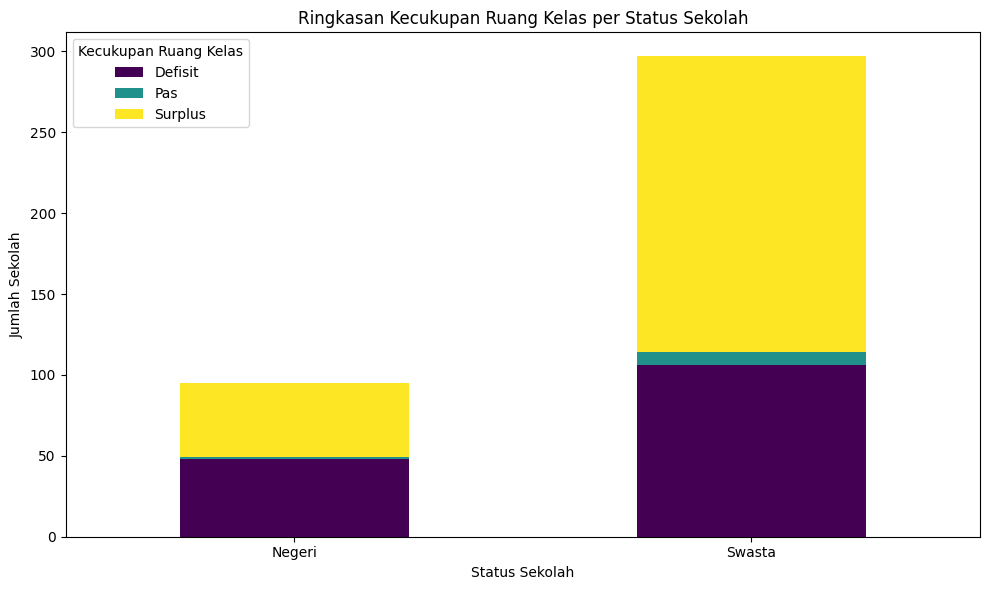

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate classroom sufficiency for all schools
df['required_classrooms'] = df['pd'] / 8
df['classroom_sufficiency'] = df['after_ruang_kelas'] - df['required_classrooms']

# Create a new column to categorize classroom sufficiency
def categorize_sufficiency(sufficiency):
    if sufficiency > 0:
        return 'Surplus'
    elif sufficiency < 0:
        return 'Defisit'
    else:
        return 'Pas'

df['classroom_sufficiency_category'] = df['classroom_sufficiency'].apply(categorize_sufficiency)

# Group by status_sekolah and the new sufficiency category, then count
sufficiency_summary = df.groupby(['status_sekolah', 'classroom_sufficiency_category']).size().unstack(fill_value=0)

print("\n=== Ringkasan Kecukupan Ruang Kelas per Status Sekolah ===")
display(sufficiency_summary)

# Visualize the summary using a stacked bar chart
sufficiency_summary.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Ringkasan Kecukupan Ruang Kelas per Status Sekolah')
plt.xlabel('Status Sekolah')
plt.ylabel('Jumlah Sekolah')
plt.xticks(rotation=0) # Ensure x-axis labels are horizontal
plt.legend(title='Kecukupan Ruang Kelas')
plt.tight_layout()
plt.show()

In [53]:
# Filter data for Negeri status only
df_negeri = df[df['status_sekolah'] == 'Negeri'].copy()

# Define the columns for the facilities to check (using 'after' counts)
facility_cols = [
    'after_ruang_kelas',
    'after_ruang_perpus',
    'after_ruang_lab',
    'after_ruang_tu',  # Assuming ruang administrasi is ruang TU
    'after_ruang_uks', # Assuming ruang kesehatan is ruang UKS
    'after_ruang_ibadah',
    'after_tempat_bermain_olahraga',
    'after_gudang', # Assuming kantin might be included in 'gudang' or another general space, using gudang for now.
    'after_toilet'
]

# Check if all specified facilities have a count greater than 0 for each school
# Note: This assumes a count > 0 means the facility is "present".
# If 'kantin' is a separate column not included above, this will need adjustment.
# Assuming 'ruang administrasi' is 'after_ruang_tu' and 'ruang kesehatan' is 'after_ruang_uks'.
# Assuming 'kantin' is not explicitly listed and skipping or using 'after_gudang' as a proxy.
# Let's refine facility_cols based on available data and common school facilities.
# Based on available columns, 'after_ruang_tu' for administrasi, 'after_ruang_uks' for kesehatan.
# There is no explicit 'kantin' column. Let's exclude 'kantin' for now or make an assumption.
# Let's use the columns that clearly match the requested facilities.

facility_cols_refined = [
    'after_ruang_kelas',
    'after_ruang_perpus',
    'after_ruang_lab',
    'after_ruang_tu',
    'after_ruang_uks',
    'after_ruang_ibadah',
    'after_tempat_bermain_olahraga',
    'after_toilet' # Excluded 'kantin' as there's no clear matching column.
]


# Check if the refined facility columns exist in the DataFrame
missing_refined_cols = [col for col in facility_cols_refined if col not in df_negeri.columns]
if missing_refined_cols:
    print(f"Warning: Columns not found in DataFrame: {missing_refined_cols}")
    # Exclude missing columns from the check
    facility_cols_to_check = [col for col in facility_cols_refined if col in df_negeri.columns]
else:
    facility_cols_to_check = facility_cols_refined

if facility_cols_to_check:
    # Create a boolean mask where True means the facility is present (count > 0)
    facility_presence_mask = df_negeri[facility_cols_to_check] > 0

    # Check if ALL selected facilities are present for each school
    df_negeri['all_facilities_present'] = facility_presence_mask.all(axis=1)

    # Assign a score of 9 if all facilities are present, 0 otherwise
    df_negeri['facility_score'] = df_negeri['all_facilities_present'].apply(lambda x: 9 if x else 0)

    print("\n=== Facility Presence and Score (Negeri Schools) ===")
    # Display relevant columns including the new score
    display_cols = ['sekolah'] + facility_cols_to_check + ['all_facilities_present', 'facility_score']
    display(df_negeri[display_cols].head())

    # Optional: Display schools with a score of 9
    print("\n=== Negeri Schools with All Specified Facilities Present (Score 9) ===")
    display(df_negeri[df_negeri['facility_score'] == 9][['sekolah'] + facility_cols_to_check + ['facility_score']])

else:
    print("No valid facility columns found to perform the check.")


=== Facility Presence and Score (Negeri Schools) ===


,sekolah,after_ruang_kelas,after_ruang_perpus,after_ruang_lab,after_ruang_tu,after_ruang_uks,after_ruang_ibadah,after_tempat_bermain_olahraga,after_toilet,all_facilities_present,facility_score
2,SLB NEGERI KELEYAN BANGKALAN,6,1,0,1,1,0,0,5,False,0
11,SDLB ABCD PGRI 3 CLURING,6,1,1,0,0,1,0,3,False,0
12,SLB PGRI 3 CLURING,7,1,2,1,1,1,1,4,True,9
13,SLB NEGERI TAMANAGUNG BANYUWANGI,12,1,0,0,1,1,0,9,False,0
14,SMALBS BHAKTI PERTIWI,8,1,0,1,0,0,0,2,False,0



=== Negeri Schools with All Specified Facilities Present (Score 9) ===


,sekolah,after_ruang_kelas,after_ruang_perpus,after_ruang_lab,after_ruang_tu,after_ruang_uks,after_ruang_ibadah,after_tempat_bermain_olahraga,after_toilet,facility_score
12,SLB PGRI 3 CLURING,7,1,2,1,1,1,1,4,9
157,SLB NEGERI METESIH KABUPATEN MADIUN,9,1,1,1,1,1,1,4,9
176,SLBN PEMBINA TINGKAT NASIONAL BAGIAN C MALANG,31,1,2,1,1,2,1,5,9
254,SLB NEGERI GEDANGAN,32,1,2,2,1,1,1,16,9
313,SLB NEGERI 2 KOTA BLITAR,15,1,1,1,1,1,1,5,9


In [62]:
# Filter data for Negeri status only
df_negeri = df[df['status_sekolah'] == 'Negeri'].copy()

# Define the columns for the 8 facilities to check (using 'after' counts)
# Based on the previous check, 'after_kantin' is not available, so we'll use the 8 available ones.
facility_cols_to_check = [
    'after_ruang_kelas',
    'after_ruang_perpus',
    'after_ruang_lab',
    'after_ruang_tu',
    'after_ruang_uks',
    'after_ruang_ibadah',
    'after_tempat_bermain_olahraga',
    'after_toilet'
]

# Ensure all facility columns exist in the DataFrame before proceeding
missing_cols_check = [col for col in facility_cols_to_check if col not in df_negeri.columns]
if missing_cols_check:
    print(f"Error: Some facility columns are missing from the DataFrame: {missing_cols_check}")
else:
    # Create a boolean mask where True means the facility is present (count > 0)
    facility_presence_mask = df_negeri[facility_cols_to_check] > 0

    # Count the number of present facilities for each school
    df_negeri['present_facilities_count'] = facility_presence_mask.sum(axis=1)

    # Calculate the percentage score
    total_facilities_checked = len(facility_cols_to_check)
    df_negeri['facility_percentage_score'] = (df_negeri['present_facilities_count'] / total_facilities_checked) * 100

    print("\n=== Skor Fasilitas Persentase (Sekolah Negeri) ===")
    print(f"Skor dihitung berdasarkan {total_facilities_checked} jenis fasilitas: {', '.join(facility_cols_to_check)}")

    # Display school name and the new percentage score for all Negeri schools
    display(df_negeri[['sekolah', 'present_facilities_count', 'facility_percentage_score']])

    # Optional: Display schools with a 100% score
    print("\n=== Negeri Schools with 100% Facility Score ===")
    display(df_negeri[df_negeri['facility_percentage_score'] == 100][['sekolah', 'facility_percentage_score']])


=== Skor Fasilitas Persentase (Sekolah Negeri) ===
Skor dihitung berdasarkan 8 jenis fasilitas: after_ruang_kelas, after_ruang_perpus, after_ruang_lab, after_ruang_tu, after_ruang_uks, after_ruang_ibadah, after_tempat_bermain_olahraga, after_toilet


,sekolah,present_facilities_count,facility_percentage_score
2,SLB NEGERI KELEYAN BANGKALAN,5,62.5
11,SDLB ABCD PGRI 3 CLURING,5,62.5
12,SLB PGRI 3 CLURING,8,100.0
13,SLB NEGERI TAMANAGUNG BANYUWANGI,5,62.5
14,SMALBS BHAKTI PERTIWI,4,50.0
...,...,...,...
333,SLB C AUTIS NEGERI KEDUNGKANDANG KOTA MALANG,4,50.0
334,SLB YAYASAN PUTRA PANCASILA,4,50.0
345,SLB ARYA SATYA HATI,3,37.5
346,SLB NEGERI 1 KOTA PASURUAN,7,87.5



=== Negeri Schools with 100% Facility Score ===


,sekolah,facility_percentage_score
12,SLB PGRI 3 CLURING,100.0
157,SLB NEGERI METESIH KABUPATEN MADIUN,100.0
176,SLBN PEMBINA TINGKAT NASIONAL BAGIAN C MALANG,100.0
254,SLB NEGERI GEDANGAN,100.0
313,SLB NEGERI 2 KOTA BLITAR,100.0


In [63]:
# Filter data for Negeri status only
df_negeri = df[df['status_sekolah'] == 'Negeri'].copy()

# Define the columns for the 8 facilities to check (using 'after' counts)
facility_cols_to_check = [
    'after_ruang_kelas',
    'after_ruang_perpus',
    'after_ruang_lab',
    'after_ruang_tu',
    'after_ruang_uks',
    'after_ruang_ibadah',
    'after_tempat_bermain_olahraga',
    'after_toilet'
]

# Ensure all facility columns exist in the DataFrame before proceeding
facility_cols_to_check = [col for col in facility_cols_to_check if col in df_negeri.columns]

if facility_cols_to_check:
    # Create a boolean mask where True means the facility is present (count > 0)
    facility_presence_mask = df_negeri[facility_cols_to_check] > 0

    # Count the number of present facilities for each school
    df_negeri['present_facilities_count'] = facility_presence_mask.sum(axis=1)

    # Group by the count of present facilities and summarize
    print("\n=== Ringkasan Jumlah Fasilitas yang Tersedia per Sekolah (Sekolah Negeri) ===")
    facility_count_summary = df_negeri['present_facilities_count'].value_counts().sort_index().reset_index()
    facility_count_summary.columns = ['Jumlah Fasilitas Tersedia', 'Jumlah Sekolah']
    display(facility_count_summary)

else:
    print("No valid facility columns found to perform the check.")


=== Ringkasan Jumlah Fasilitas yang Tersedia per Sekolah (Sekolah Negeri) ===


,Jumlah Fasilitas Tersedia,Jumlah Sekolah
0,0,3
1,2,6
2,3,14
3,4,23
4,5,18
5,6,13
6,7,13
7,8,5



=== Ringkasan Jumlah Fasilitas yang Tersedia per Sekolah (Negeri vs Swasta) ===


present_facilities_count,0,1,2,3,4,5,6,7,8
status_sekolah,,,,,,,,,
Negeri,3,0,6,14,23,18,13,13,5
Swasta,21,1,48,56,57,43,42,23,6


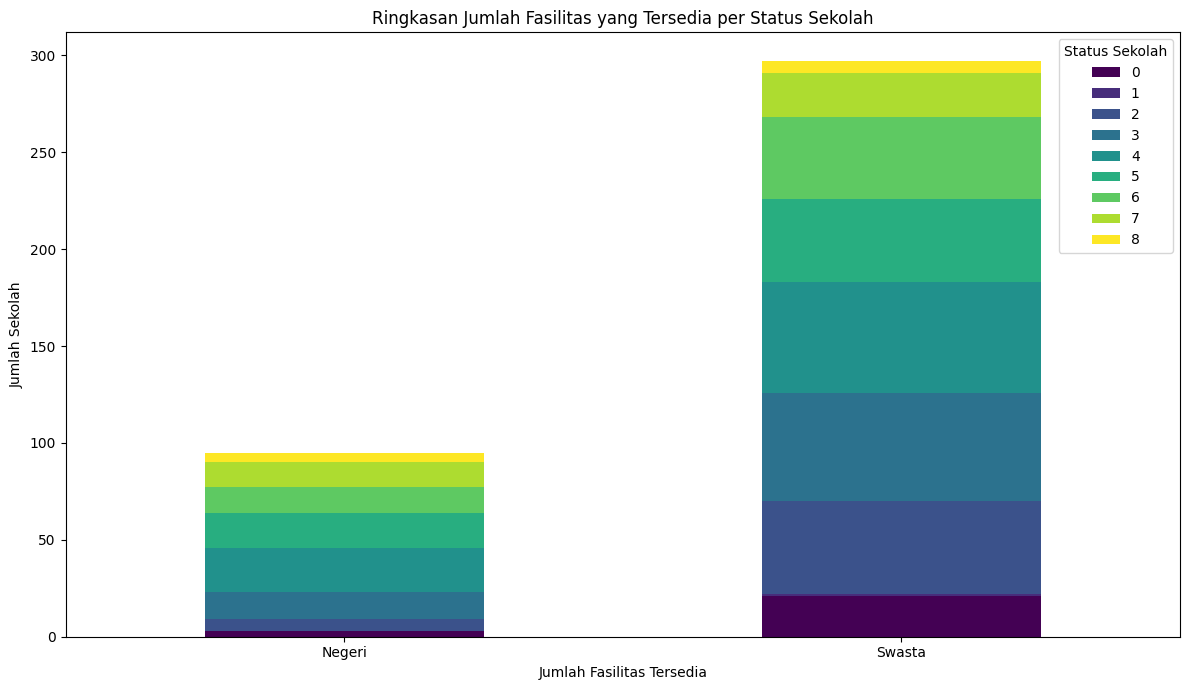

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the columns for the 8 facilities to check (using 'after' counts)
facility_cols_to_check = [
    'after_ruang_kelas',
    'after_ruang_perpus',
    'after_ruang_lab',
    'after_ruang_tu',
    'after_ruang_uks',
    'after_ruang_ibadah',
    'after_tempat_bermain_olahraga',
    'after_toilet'
]

# Ensure all facility columns exist in the DataFrame before proceeding
facility_cols_to_check = [col for col in df.columns if col in facility_cols_to_check]

if facility_cols_to_check:
    # Create a boolean mask where True means the facility is present (count > 0) for all schools
    facility_presence_mask = df[facility_cols_to_check] > 0

    # Count the number of present facilities for each school
    df['present_facilities_count'] = facility_presence_mask.sum(axis=1)

    # Group by status_sekolah and the count of present facilities and summarize
    print("\n=== Ringkasan Jumlah Fasilitas yang Tersedia per Sekolah (Negeri vs Swasta) ===")
    facility_count_summary = df.groupby(['status_sekolah', 'present_facilities_count']).size().unstack(fill_value=0)

    display(facility_count_summary)

    # Visualize the summary using a grouped or stacked bar chart
    facility_count_summary.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='viridis')
    plt.title('Ringkasan Jumlah Fasilitas yang Tersedia per Status Sekolah')
    plt.xlabel('Jumlah Fasilitas Tersedia')
    plt.ylabel('Jumlah Sekolah')
    plt.xticks(rotation=0) # Ensure x-axis labels are horizontal
    plt.legend(title='Status Sekolah')
    plt.tight_layout()
    plt.show()

else:
    print("No valid facility columns found to perform the check.")

In [66]:
# Filter data for Negeri status only
df_negeri = df[df['status_sekolah'] == 'Negeri'].copy()

# Define the columns for the 8 facilities to check (using 'after' counts)
facility_cols_to_check = [
    'after_ruang_kelas',
    'after_ruang_perpus',
    'after_ruang_lab',
    'after_ruang_tu',
    'after_ruang_uks',
    'after_ruang_ibadah',
    'after_tempat_bermain_olahraga',
    'after_toilet'
]

# Ensure all facility columns exist in the DataFrame before proceeding
facility_cols_to_check = [col for col in facility_cols_to_check if col in df_negeri.columns]

if facility_cols_to_check:
    # Create a boolean mask where True means the facility is present (count > 0)
    facility_presence_mask = df_negeri[facility_cols_to_check] > 0

    # Count the number of present facilities for each school
    df_negeri['present_facilities_count'] = facility_presence_mask.sum(axis=1)

    # Filter for schools with 0 present facilities
    schools_with_zero_facilities = df_negeri[df_negeri['present_facilities_count'] == 0]

    print("\n=== Sekolah Negeri dengan 0 Fasilitas dari Daftar yang Diperiksa ===")
    if not schools_with_zero_facilities.empty:
        # Display school name and the counts for each facility column
        display_cols = ['sekolah'] + facility_cols_to_check
        display(schools_with_zero_facilities[display_cols])
    else:
        print("Tidak ada sekolah Negeri dengan 0 fasilitas dari daftar yang diperiksa.")

else:
    print("No valid facility columns found to perform the check.")


=== Sekolah Negeri dengan 0 Fasilitas dari Daftar yang Diperiksa ===


,sekolah,after_ruang_kelas,after_ruang_perpus,after_ruang_lab,after_ruang_tu,after_ruang_uks,after_ruang_ibadah,after_tempat_bermain_olahraga,after_toilet
62,SLB NEGERI TAMBAHREJO BOJONEGORO,0,0,0,0,0,0,0,0
115,SLB BUDI MULYA KANDAT,0,0,0,0,0,0,0,0
209,SLB Krida Utama 1 Tanjunganom,0,0,0,0,0,0,0,0


In [68]:
# Filter data for Negeri status only
df_negeri = df[df['status_sekolah'] == 'Negeri'].copy()

# Define the columns for all facilities (both 'before' and 'after')
all_facility_cols = [col for col in df_negeri.columns if 'ruang' in col or 'laboratorium' in col or 'perpustakaan' in col or 'bangunan' in col or 'toilet' in col or 'gudang' in col or 'tempat_bermain_olahraga' in col]

# Ensure all facility columns exist in the DataFrame before proceeding
all_facility_cols_existing = [col for col in all_facility_cols if col in df_negeri.columns]

if all_facility_cols_existing:
    # Get the list of schools with 0 facilities from the previous analysis (assuming it ran successfully and the variable exists)
    # If not running sequentially or variable was cleared, re-identify schools with 0 facilities
    if 'schools_with_zero_facilities' not in locals() or schools_with_zero_facilities.empty:
         # Re-calculate 'present_facilities_count' if needed to identify the schools
        facility_cols_to_check = [
            'after_ruang_kelas', 'after_ruang_perpus', 'after_ruang_lab', 'after_ruang_tu',
            'after_ruang_uks', 'after_ruang_ibadah', 'after_tempat_bermain_olahraga', 'after_toilet'
        ]
        facility_cols_to_check = [col for col in facility_cols_to_check if col in df_negeri.columns]
        if facility_cols_to_check:
             df_negeri['present_facilities_count'] = (df_negeri[facility_cols_to_check] > 0).sum(axis=1)
             schools_with_zero_facilities = df_negeri[df_negeri['present_facilities_count'] == 0]
        else:
            print("Could not identify schools with 0 facilities as required columns are missing.")
            schools_with_zero_facilities = pd.DataFrame() # Create empty DataFrame to avoid errors


    if not schools_with_zero_facilities.empty:
        # Filter df_negeri to include only these schools and display all facility columns
        schools_facility_data = df_negeri[df_negeri['sekolah'].isin(schools_with_zero_facilities['sekolah'])]

        print("\n=== Data Fasilitas (Before & After) untuk Sekolah Negeri dengan 0 Fasilitas ===")
        # Display school name and all relevant facility columns
        display_cols = ['sekolah'] + all_facility_cols_existing
        display(schools_facility_data[display_cols])
    else:
        print("Tidak ada sekolah Negeri dengan 0 fasilitas untuk ditampilkan data before/after nya.")

else:
    print("No valid facility columns found to perform the check.")


=== Data Fasilitas (Before & After) untuk Sekolah Negeri dengan 0 Fasilitas ===


,sekolah,before_ruang_kelas,after_ruang_kelas,before_ruang_perpus,after_ruang_perpus,before_ruang_lab,after_ruang_lab,before_ruang_praktik,after_ruang_praktik,before_ruang_pimpinan,...,before_tempat_bermain_olahraga,after_tempat_bermain_olahraga,before_ruang_tu,after_ruang_tu,before_ruang_konseling,after_ruang_konseling,before_ruang_osis,after_ruang_osis,before_bangunan,after_bangunan
62,SLB NEGERI TAMBAHREJO BOJONEGORO,4,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5,5
115,SLB BUDI MULYA KANDAT,12,0,1,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,7,7
209,SLB Krida Utama 1 Tanjunganom,13,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,6,6


In [73]:
# Filter data for Negeri status only
df_negeri = df[df['status_sekolah'] == 'Negeri'].copy()

# Get the total count of Negeri schools
total_negeri_schools = len(df_negeri)

print("\n=== Rangkuman Jumlah Sekolah Negeri ===")
print(f"Jumlah total sekolah Negeri: {total_negeri_schools}")


=== Rangkuman Jumlah Sekolah Negeri ===
Jumlah total sekolah Negeri: 95


In [75]:
# Filter data for Negeri status only
df_negeri = df[df['status_sekolah'] == 'Negeri'].copy()

# Define the columns for the 8 facilities to check (using 'after' counts)
facility_cols_to_check = [
    'after_ruang_kelas',
    'after_ruang_perpus',
    'after_ruang_lab',
    'after_ruang_tu',
    'after_ruang_uks',
    'after_ruang_ibadah',
    'after_tempat_bermain_olahraga',
    'after_toilet'
]

# Ensure all facility columns exist in the DataFrame before proceeding
facility_cols_to_check = [col for col in facility_cols_to_check if col in df_negeri.columns]

if facility_cols_to_check:
    # Create a boolean mask where True means the facility is present (count > 0)
    facility_presence_mask = df_negeri[facility_cols_to_check] > 0

    # Count the number of present facilities for each school
    df_negeri['present_facilities_count'] = facility_presence_mask.sum(axis=1)

    # Identify schools with 0 present facilities
    schools_to_remove_negeri = df_negeri[df_negeri['present_facilities_count'] == 0]['sekolah'].tolist()

    # Remove these schools from the df_negeri DataFrame
    df_negeri_cleaned = df_negeri[~df_negeri['sekolah'].isin(schools_to_remove_negeri)].copy()

    print("\n=== Sekolah Negeri Setelah Penghapusan Sekolah dengan 0 Fasilitas ===")
    print(f"Jumlah sekolah Negeri sebelum dihapus: {len(df_negeri)}")
    print(f"Jumlah sekolah Negeri yang dihapus (tidak memiliki fasilitas): {len(schools_to_remove_negeri)}")
    print(f"Jumlah sekolah Negeri setelah dihapus: {len(df_negeri_cleaned)}")

    # You can now use df_negeri_cleaned for further analysis on Negeri schools excluding those with no facilities.
else:
    print("Tidak ada kolom fasilitas yang valid untuk melakukan pengecekan dan penghapusan pada sekolah Negeri.")


=== Sekolah Negeri Setelah Penghapusan Sekolah dengan 0 Fasilitas ===
Jumlah sekolah Negeri sebelum dihapus: 95
Jumlah sekolah Negeri yang dihapus (tidak memiliki fasilitas): 3
Jumlah sekolah Negeri setelah dihapus: 92


In [61]:
# List of facilities mentioned by the user and their potential column names (using 'after_' prefix)
facilities_to_check = {
    'ruang kelas': 'after_ruang_kelas',
    'ruang perpustakaan': 'after_ruang_perpus',
    'ruang laboratorium': 'after_ruang_lab',
    'ruang administrasi': 'after_ruang_tu', # Assuming 'ruang administrasi' maps to 'after_ruang_tu'
    'ruang kesehatan': 'after_ruang_uks', # Assuming 'ruang kesehatan' maps to 'after_ruang_uks'
    'tempat beribadah': 'after_ruang_ibadah',
    'tempat bermain atau berolahraga': 'after_tempat_bermain_olahraga',
    'kantin': 'after_kantin', # Check for a 'kantin' column
    'toilet': 'after_toilet'
}

# Check which of these potential column names exist in the DataFrame
existing_cols = [col for col in facilities_to_check.values() if col in df.columns]
missing_cols = [col for col in facilities_to_check.values() if col not in df.columns]

print("=== Ketersediaan Kolom Fasilitas di DataFrame ===")
print("\nKolom yang Tersedia untuk Analisis:")
if existing_cols:
    for col in existing_cols:
        # Find the user-friendly facility name for the existing column
        facility_name = [name for name, col_name in facilities_to_check.items() if col_name == col][0]
        print(f"- {facility_name} ({col})")
else:
    print("- Tidak ada kolom fasilitas yang sesuai ditemukan.")

print("\nKolom yang Tidak Tersedia:")
if missing_cols:
    for col in missing_cols:
         # Find the user-friendly facility name for the missing column
        facility_name = [name for name, col_name in facilities_to_check.items() if col_name == col][0]
        print(f"- {facility_name} ({col})")
else:
    print("- Semua kolom fasilitas yang dicari tersedia atau tidak ada dalam daftar periksa.")

# Note: The mapping of facility names to column names (e.g., 'ruang administrasi' to 'after_ruang_tu') is based on assumption.
# If there are different column names for these facilities, the mapping in 'facilities_to_check' should be adjusted.

=== Ketersediaan Kolom Fasilitas di DataFrame ===

Kolom yang Tersedia untuk Analisis:
- ruang kelas (after_ruang_kelas)
- ruang perpustakaan (after_ruang_perpus)
- ruang laboratorium (after_ruang_lab)
- ruang administrasi (after_ruang_tu)
- ruang kesehatan (after_ruang_uks)
- tempat beribadah (after_ruang_ibadah)
- tempat bermain atau berolahraga (after_tempat_bermain_olahraga)
- toilet (after_toilet)

Kolom yang Tidak Tersedia:
- kantin (after_kantin)


In [33]:
# Filter data for Negeri status only
df_negeri = df[df['status_sekolah'] == 'Negeri'].copy()

# 4. Indeks infrastruktur (jumlah ruang, lab, perpustakaan, bangunan)
infrastructure_cols = [
    col for col in df_negeri.columns
    if 'ruang' in col or 'laboratorium' in col or 'perpustakaan' in col or 'bangunan' in col
]
df_negeri['infrastructure_index'] = df_negeri[infrastructure_cols].sum(axis=1)
print("\n=== Indeks Infrastruktur (sample - Negeri Schools) ===")
display(df_negeri[['sekolah'] + infrastructure_cols + ['infrastructure_index']].head())


=== Indeks Infrastruktur (sample - Negeri Schools) ===


,sekolah,before_ruang_kelas,after_ruang_kelas,before_ruang_perpus,after_ruang_perpus,before_ruang_lab,after_ruang_lab,before_ruang_praktik,after_ruang_praktik,before_ruang_pimpinan,...,after_ruang_sirkulasi,before_ruang_tu,after_ruang_tu,before_ruang_konseling,after_ruang_konseling,before_ruang_osis,after_ruang_osis,before_bangunan,after_bangunan,infrastructure_index
2,SLB NEGERI KELEYAN BANGKALAN,6,6,1,1,0,0,0,0,1,...,0,1,1,0,0,0,0,6,6,34
11,SDLB ABCD PGRI 3 CLURING,6,6,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,1,1,26
12,SLB PGRI 3 CLURING,7,7,1,1,2,2,1,1,1,...,0,1,1,1,1,1,1,1,1,38
13,SLB NEGERI TAMANAGUNG BANYUWANGI,12,12,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,18,18,70
14,SMALBS BHAKTI PERTIWI,8,8,1,1,0,0,0,0,1,...,0,1,1,0,0,0,0,1,1,26


In [34]:
# Filter data for Negeri status only
df_negeri = df[df['status_sekolah'] == 'Negeri'].copy()

# 5. Rasio gender siswa & guru
df_negeri['student_gender_ratio'] = df_negeri['pd_perempuan'] / df_negeri['pd_laki']
df_negeri['teacher_gender_ratio'] = df_negeri['ptk_perempuan'] / df_negeri['ptk_laki']
print("\n=== Rasio Gender Siswa & Guru (sample - Negeri Schools) ===")
display(df_negeri[['sekolah', 'pd_perempuan', 'pd_laki', 'student_gender_ratio',
          'ptk_perempuan', 'ptk_laki', 'teacher_gender_ratio']].head())


=== Rasio Gender Siswa & Guru (sample - Negeri Schools) ===


,sekolah,pd_perempuan,pd_laki,student_gender_ratio,ptk_perempuan,ptk_laki,teacher_gender_ratio
2,SLB NEGERI KELEYAN BANGKALAN,18,32,0.562500,13,6,2.166667
11,SDLB ABCD PGRI 3 CLURING,1,0,inf,4,0,inf
12,SLB PGRI 3 CLURING,39,49,0.795918,3,2,1.500000
13,SLB NEGERI TAMANAGUNG BANYUWANGI,44,59,0.745763,21,10,2.100000
14,SMALBS BHAKTI PERTIWI,7,6,1.166667,5,0,inf


# Exploratory Data Analysis (EDA)

In [35]:
# Filter data for Negeri status only
df_negeri = df[df['status_sekolah'] == 'Negeri'].copy()

# 1. Distribusi SLB per kabupaten/kota (This requires geospatial data which is not available, so we'll show a count per district/city)
print("\n=== Jumlah SLB per Kabupaten/Kota (Negeri Schools) ===")
slb_per_kabupaten = df_negeri['kabupaten/kota'].value_counts().reset_index()
slb_per_kabupaten.columns = ['kabupaten/kota', 'jumlah_slb']
display(slb_per_kabupaten)


=== Jumlah SLB per Kabupaten/Kota (Negeri Schools) ===


,kabupaten/kota,jumlah_slb
0,kab. bojonegoro,8
1,kota blitar,6
2,kab. bondowoso,5
3,kab. banyuwangi,5
4,kab. sidoarjo,4
5,kab. jombang,4
6,kab. ngawi,4
7,kab. tuban,4
8,kab. probolinggo,4
9,kab. madiun,4


In [36]:
# Filter data for Negeri status only
df_negeri = df[df['status_sekolah'] == 'Negeri'].copy()

# 3. Jumlah siswa per jenjang kelas
print("\n=== Jumlah Siswa per Jenjang Kelas (Negeri Schools) ===")
siswa_per_jenjang = df_negeri[[f'pd_kelas_{i}_laki' for i in range(1, 14)] + [f'pd_kelas_{i}_perempuan' for i in range(1, 14)]].sum()
siswa_per_jenjang = siswa_per_jenjang.reset_index()
siswa_per_jenjang.columns = ['kelas_gender', 'jumlah_siswa']
siswa_per_jenjang['jenjang'] = siswa_per_jenjang['kelas_gender'].apply(lambda x: int(x.split('_')[2]))
siswa_per_jenjang['gender'] = siswa_per_jenjang['kelas_gender'].apply(lambda x: x.split('_')[3])
siswa_per_jenjang_total = siswa_per_jenjang.groupby('jenjang')['jumlah_siswa'].sum().reset_index()
display(siswa_per_jenjang_total)


=== Jumlah Siswa per Jenjang Kelas (Negeri Schools) ===


,jenjang,jumlah_siswa
0,1,593
1,2,679
2,3,630
3,4,665
4,5,573
5,6,549
6,7,779
7,8,752
8,9,707
9,10,701


In [37]:
# Filter data for Negeri status only
df_negeri = df[df['status_sekolah'] == 'Negeri'].copy()

# Calculate ratios *before* handling inf values for display
df_negeri['student_gender_ratio'] = df_negeri['pd_perempuan'] / df_negeri['pd_laki']
df_negeri['teacher_gender_ratio'] = df_negeri['ptk_perempuan'] / df_negeri['ptk_laki']


# 4. Perbandingan gender siswa/guru
print("\n=== Perbandingan Gender Siswa dan Guru (Negeri Schools) ===")

# Handle infinite values in gender ratios
df_negeri['teacher_gender_ratio_handled'] = df_negeri['teacher_gender_ratio'].replace([float('inf'), float('-inf')], float('nan'))
df_negeri['student_gender_ratio_handled'] = df_negeri['student_gender_ratio'].replace([float('inf'), float('-inf')], float('nan'))


# Calculate and display gender ratios in 1:X format for each school
def format_gender_ratio(ratio):
    if pd.isna(ratio):
        return "N/A"
    elif ratio >= 1:
        return f"1:{ratio:.2f}"
    elif ratio > 0 and ratio < 1:
        return f"1:{1/ratio:.2f}"
    elif ratio == 0:
        return "1:Inf" # Or handle as appropriate for zero in numerator
    else:
         return "N/A"

# Apply the formatting function to the handled ratio columns
df_negeri['Student_Gender_Ratio_Formatted'] = df_negeri['student_gender_ratio_handled'].apply(format_gender_ratio)
df_negeri['Teacher_Gender_Ratio_Formatted'] = df_negeri['teacher_gender_ratio_handled'].apply(format_gender_ratio)


# Display the original columns and the new formatted ratio columns
display(df_negeri[['sekolah', 'pd_perempuan', 'pd_laki', 'Student_Gender_Ratio_Formatted',
          'ptk_perempuan', 'ptk_laki', 'Teacher_Gender_Ratio_Formatted']].head())

print(f"\nTotal Siswa Laki-laki (Negeri Schools): {df_negeri['pd_laki'].sum()}")
print(f"Total Siswa Perempuan (Negeri Schools): {df_negeri['pd_perempuan'].sum()}")
print(f"Total Guru Laki-laki (Negeri Schools): {df_negeri['ptk_laki'].sum()}")
print(f"Total Guru Perempuan (Negeri Schools): {df_negeri['ptk_perempuan'].sum()}")


=== Perbandingan Gender Siswa dan Guru (Negeri Schools) ===


,sekolah,pd_perempuan,pd_laki,Student_Gender_Ratio_Formatted,ptk_perempuan,ptk_laki,Teacher_Gender_Ratio_Formatted
2,SLB NEGERI KELEYAN BANGKALAN,18,32,1:1.78,13,6,1:2.17
11,SDLB ABCD PGRI 3 CLURING,1,0,N/A,4,0,N/A
12,SLB PGRI 3 CLURING,39,49,1:1.26,3,2,1:1.50
13,SLB NEGERI TAMANAGUNG BANYUWANGI,44,59,1:1.34,21,10,1:2.10
14,SMALBS BHAKTI PERTIWI,7,6,1:1.17,5,0,N/A



Total Siswa Laki-laki (Negeri Schools): 4979
Total Siswa Perempuan (Negeri Schools): 3118
Total Guru Laki-laki (Negeri Schools): 367
Total Guru Perempuan (Negeri Schools): 1068


In [38]:
# Filter data for Negeri status only
df_negeri = df[df['status_sekolah'] == 'Negeri'].copy()

# Recalculate necessary columns after filtering
df_negeri['teacher_student_ratio'] = df_negeri['ptk'] / df_negeri['pd']
df_negeri['student_gender_ratio'] = df_negeri['pd_perempuan'] / df_negeri['pd_laki']
df_negeri['teacher_gender_ratio'] = df_negeri['ptk_perempuan'] / df_negeri['ptk_laki']
infrastructure_cols = [
    col for col in df_negeri.columns
    if 'ruang' in col or 'laboratorium' in col or 'perpustakaan' in col or 'bangunan' in col
]
df_negeri['infrastructure_index'] = df_negeri[infrastructure_cols].sum(axis=1)

# Handle potential NaN or infinite values in ratios for correlation calculation
df_negeri['teacher_gender_ratio'] = df_negeri['teacher_gender_ratio'].replace([np.inf, -np.inf], np.nan)
df_negeri['student_gender_ratio'] = df_negeri['student_gender_ratio'].replace([np.inf, -np.inf], float('nan'))
df_negeri['teacher_student_ratio'] = df_negeri['teacher_student_ratio'].replace([np.inf, -np.inf], float('nan'))


# 5. Korelasi awal antara sarpras, guru, dan akreditasi
print("\n=== Korelasi antara Infrastructure Index, PTK, PD, dan Ratios (Negeri Schools) ===")
correlation_cols = ['infrastructure_index', 'ptk', 'pd', 'teacher_student_ratio', 'student_gender_ratio', 'teacher_gender_ratio']
correlation_matrix = df_negeri[correlation_cols].corr()
display(correlation_matrix)


=== Korelasi antara Infrastructure Index, PTK, PD, dan Ratios (Negeri Schools) ===


,infrastructure_index,ptk,pd,teacher_student_ratio,student_gender_ratio,teacher_gender_ratio
infrastructure_index,1.000000,0.672335,0.715761,-0.081196,-0.057451,-0.071074
ptk,0.672335,1.000000,0.784553,-0.059486,-0.025312,-0.022164
pd,0.715761,0.784553,1.000000,-0.219018,-0.104071,-0.090358
teacher_student_ratio,-0.081196,-0.059486,-0.219018,1.000000,0.035826,0.167005
student_gender_ratio,-0.057451,-0.025312,-0.104071,0.035826,1.000000,0.008136
teacher_gender_ratio,-0.071074,-0.022164,-0.090358,0.167005,0.008136,1.000000


#Modeling & Analisis Lanjutan


## 1. Clustering (K-Means/Hierarchical)

In [39]:
# Select the features for clustering
features = ['teacher_student_ratio', 'infrastructure_index', 'pd']

# Filter data for Negeri status only
df_negeri = df[df['status_sekolah'] == 'Negeri'].copy()

# Recalculate necessary columns after filtering (as done in previous cells)
df_negeri['teacher_student_ratio'] = df_negeri['ptk'] / df_negeri['pd']
infrastructure_cols = [
    col for col in df_negeri.columns
    if 'ruang' in col or 'laboratorium' in col or 'perpustakaan' in col or 'bangunan' in col
]
df_negeri['infrastructure_index'] = df_negeri[infrastructure_cols].sum(axis=1)


# Handle potential NaN or infinite values in selected features before grouping
df_negeri.replace([np.inf, -np.inf], np.nan, inplace=True)
# For simplicity, we will fill NaN with the mean of the column.
# You might choose a different strategy based on your data.
for feature in features:
    df_negeri[feature].fillna(df_negeri[feature].mean(), inplace=True)


# Calculate the mean per feature grouped by kabupaten/kota
print("\n=== Mean of Features per Kabupaten/Kota (Negeri Schools) ===")
mean_features_per_district = df_negeri.groupby('kabupaten/kota')[features].mean().reset_index()

# Handle potential inf in the mean features output
mean_features_per_district = mean_features_per_district.replace([np.inf, -np.inf], float('nan'))

display(mean_features_per_district)


=== Mean of Features per Kabupaten/Kota (Negeri Schools) ===


/tmp/ipython-input-2957254467.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_negeri[feature].fillna(df_negeri[feature].mean(), inplace=True)


,kabupaten/kota,teacher_student_ratio,infrastructure_index,pd
0,kab. bangkalan,0.380000,34.000000,50.000000
1,kab. banyuwangi,1.012386,39.600000,74.800000
2,kab. blitar,0.210000,73.000000,100.000000
3,kab. bojonegoro,0.155243,35.125000,79.250000
4,kab. bondowoso,0.201645,34.200000,42.000000
5,kab. gresik,0.110345,54.000000,145.000000
6,kab. jember,0.201472,102.500000,158.000000
7,kab. jombang,0.177952,45.000000,85.250000
8,kab. kediri,0.230256,43.500000,70.000000
9,kab. lamongan,0.155682,42.000000,82.000000


In [40]:
# Normalisasi teks kabupaten/kota & kecamatan
df['kabupaten/kota'] = df['kabupaten/kota'].str.lower().str.strip()
df['kecamatan'] = df['kecamatan'].str.lower().str.strip()

# Filter data for Negeri status only
df_negeri = df[df['status_sekolah'] == 'Negeri'].copy()

# Recalculate necessary columns after filtering
df_negeri['teacher_student_ratio'] = df_negeri['ptk'] / df_negeri['pd']
infrastructure_cols = [
    col for col in df_negeri.columns
    if 'ruang' in col or 'laboratorium' in col or 'perpustakaan' in col or 'bangunan' in col
]
df_negeri['infrastructure_index'] = df_negeri[infrastructure_cols].sum(axis=1)


# Select the features for clustering
features = ['teacher_student_ratio', 'infrastructure_index', 'pd']
X = df_negeri[features].copy()

# Handle potential NaN or infinite values in selected features before scaling and clustering
# For simplicity, we will fill NaN with the mean of the column.
# You might choose a different strategy based on your data.
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.fillna(X.mean(), inplace=True)


# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters (e.g., using the Elbow method)
# For this example, let's assume we want 3 clusters as suggested by the output requirement
n_clusters = 3

# Apply K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10) # Added n_init to suppress warning
kmeans.fit(X_scaled) # Train the model
df_negeri['cluster'] = kmeans.labels_

# Analyze the characteristics of each cluster
print("\n=== Cluster Analysis (Negeri Schools) ===")
cluster_summary = df_negeri.groupby('cluster')[features].mean()

# Handle potential inf in the cluster summary output
cluster_summary = cluster_summary.replace([np.inf, -np.inf], float('nan'))

display(cluster_summary)

# Map cluster labels to meaningful names (this requires domain knowledge and interpretation of the cluster_summary)
# For example, based on the means in cluster_summary:
# Cluster 0 might be "Sedang"
# Cluster 1 might be "Unggul"
# Cluster 2 might be "Butuh Perhatian"
# This mapping is illustrative and should be adjusted based on the actual cluster means.
cluster_names = {
    0: 'Unggul',
    1: 'Sedang',
    2: 'Butuh Perhatian'
}

df_negeri['cluster_name'] = df_negeri['cluster'].map(cluster_names)

print("\n=== Schools with Cluster Names (Sample - Negeri Schools) ===")
display(df_negeri[['sekolah', 'cluster', 'cluster_name'] + features].head())

# You can further analyze the distribution of other variables within each cluster
# For example, the distribution of 'status_sekolah' or 'akreditasi' within each cluster.


=== Cluster Analysis (Negeri Schools) ===


,teacher_student_ratio,infrastructure_index,pd
cluster,,,
0,0.191661,34.863014,65.041096
1,0.179295,81.380952,159.428571
2,4.000000,26.000000,1.000000



=== Schools with Cluster Names (Sample - Negeri Schools) ===


,sekolah,cluster,cluster_name,teacher_student_ratio,infrastructure_index,pd
2,SLB NEGERI KELEYAN BANGKALAN,0,Unggul,0.380000,34,50
11,SDLB ABCD PGRI 3 CLURING,2,Butuh Perhatian,4.000000,26,1
12,SLB PGRI 3 CLURING,0,Unggul,0.056818,38,88
13,SLB NEGERI TAMANAGUNG BANYUWANGI,1,Sedang,0.300971,70,103
14,SMALBS BHAKTI PERTIWI,0,Unggul,0.384615,26,13


##2.	Classification (Decision Tree/Random Forest/LogReg)

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import pandas as pd

# Prepare the data for classification

# Filter data for Negeri status only
df_negeri = df[df['status_sekolah'] == 'Negeri'].copy()

# Recalculate necessary columns after filtering
df_negeri['teacher_student_ratio'] = df_negeri['ptk'] / df_negeri['pd']
infrastructure_cols = [
    col for col in df_negeri.columns
    if 'ruang' in col or 'laboratorium' in col or 'perpustakaan' in col or 'bangunan' in col
]
df_negeri['infrastructure_index'] = df_negeri[infrastructure_cols].sum(axis=1)


# Drop rows where 'akreditasi' is missing, as it's our target variable
df_classified = df_negeri.dropna(subset=['akreditasi']).copy()

# Identify and remove classes with only one member for stratified splitting
class_counts = df_classified['akreditasi'].value_counts()
rare_classes = class_counts[class_counts < 2].index
df_classified = df_classified[~df_classified['akreditasi'].isin(rare_classes)].copy()


# Define features (X) and target (y)
# Re-including 'status_sekolah' to be handled as a categorical feature
features = ['ptk', 'teacher_student_ratio', 'infrastructure_index'] # 'jumlah guru' is 'ptk'
target = 'akreditasi'

X = df_classified[features].copy() # Create a copy to avoid the warning
y = df_classified[target].copy() # Create a copy to avoid the warning

# Handle potential NaN or infinite values in selected features
X.replace([np.inf, -np.inf], np.nan, inplace=True)
# For simplicity, fill missing numerical values with the mean
numerical_features = ['ptk', 'teacher_student_ratio', 'infrastructure_index']
X.loc[:, numerical_features] = X.loc[:, numerical_features].fillna(X.loc[:, numerical_features].mean()) # Use .loc for assignment


# Encode target (akreditasi)
# Use LabelEncoder for the target
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Define preprocessing for numerical and categorical features
# Since we filtered for Negeri schools, 'status_sekolah' is not needed as a feature.
# The original features defined in 'features' are all numerical.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features) # No transformation needed for numerical features
    ])


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded) # Added stratify=y_encoded


# Create and train classification models

# Decision Tree
dt_model = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', DecisionTreeClassifier(random_state=42))])
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

print("=== Laporan Klasifikasi Decision Tree (Negeri Schools) ===")
print(classification_report(y_test, dt_pred, target_names=label_encoder.classes_))

# Random Forest
rf_model = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', RandomForestClassifier(random_state=42))])
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

print("\n=== Laporan Klasifikasi Random Forest (Negeri Schools) ===")
print(classification_report(y_test, rf_pred, target_names=label_encoder.classes_))

# Logistic Regression (Note: Might not be suitable for multi-class classification with non-linear relationships)
# lr_model = Pipeline(steps=[('preprocessor', preprocessor),
#                            ('classifier', LogisticRegression(random_state=42, max_iter=1000))])
# lr_model.fit(X_train, y_train)
# lr_pred = lr_model.predict(X_test)

# print("\n=== Laporan Klasifikasi Regresi Logistik (Negeri Schools) ===")
# print(classification_report(y_test, lr_pred, target_names=label_encoder.classes_))


# Analyze feature importance (for Decision Tree and Random Forest)
print("\n=== Kepentingan Fitur (Random Forest - Negeri Schools) ===")
# Get feature names from the preprocessor
# In this case, since only numerical features are passed through, the feature names are the same as the original numerical features
all_feature_names = numerical_features

# Access the trained Random Forest classifier from the pipeline
rf_classifier = rf_model.named_steps['classifier']
feature_importances = pd.Series(rf_classifier.feature_importances_, index=all_feature_names)
display(feature_importances.sort_values(ascending=False))

=== Laporan Klasifikasi Decision Tree (Negeri Schools) ===
              precision    recall  f1-score   support

           A       0.75      0.86      0.80         7
           B       0.80      0.80      0.80        10
           C       0.00      0.00      0.00         1

    accuracy                           0.78        18
   macro avg       0.52      0.55      0.53        18
weighted avg       0.74      0.78      0.76        18



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



=== Laporan Klasifikasi Random Forest (Negeri Schools) ===
              precision    recall  f1-score   support

           A       0.78      1.00      0.88         7
           B       0.89      0.80      0.84        10
           C       0.00      0.00      0.00         1

    accuracy                           0.83        18
   macro avg       0.56      0.60      0.57        18
weighted avg       0.80      0.83      0.81        18


=== Kepentingan Fitur (Random Forest - Negeri Schools) ===


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,0
ptk,0.343585
infrastructure_index,0.336033
teacher_student_ratio,0.320382


##3.	Regression (Linear/Multiple Regression)

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Prepare the data for regression

# Filter data for Negeri status only
df_negeri = df[df['status_sekolah'] == 'Negeri'].copy()

# Recalculate necessary columns after filtering
infrastructure_cols = [
    col for col in df_negeri.columns
    if 'ruang' in col or 'laboratorium' in col or 'perpustakaan' in col or 'bangunan' in col
]
df_negeri['infrastructure_index'] = df_negeri[infrastructure_cols].sum(axis=1)


# Define dependent variable (target) and independent variables (features)
target = 'pd' # jumlah siswa
features = ['ptk', 'infrastructure_index'] # jumlah guru, sarpras, removed status sekolah as it's filtered

# Drop rows where the target variable is missing (although based on previous checks, 'pd' has no missing values)
df_reg = df_negeri.dropna(subset=[target]).copy()

# Select features and target
X = df_reg[features].copy()
y = df_reg[target].copy()

# Handle potential NaN or infinite values in selected features
X.replace([np.inf, -np.inf], np.nan, inplace=True)
# For simplicity, fill missing numerical values with the mean
numerical_features = ['ptk', 'infrastructure_index']
X.loc[:, numerical_features] = X.loc[:, numerical_features].fillna(X.loc[:, numerical_features].mean())

# No categorical features to encode after filtering


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Linear Regression model
model = LinearRegression() # Removed preprocessor
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n=== Evaluasi Model Regresi Linear (Negeri Schools) ===")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Analyze the coefficients to understand the influence of each feature
print("\n=== Koefisien Model Regresi (Negeri Schools) ===")
# Get feature names
all_feature_names = features

coefficients = pd.Series(model.coef_, index=all_feature_names)
display(coefficients.sort_values(ascending=False))

# Interpretation of coefficients:
# For numerical features (ptk, infrastructure_index), the coefficient represents the change in 'pd' for a one-unit increase in the feature, holding other features constant.
# For one-hot encoded categorical features (status_sekolah), the coefficient represents the difference in 'pd' compared to the reference category (which is implicitly handled by OneHotEncoder's drop='first' or the absence of one category).


=== Evaluasi Model Regresi Linear (Negeri Schools) ===
Mean Squared Error (MSE): 1016.26
Root Mean Squared Error (RMSE): 31.88
R-squared (R2): 0.65

=== Koefisien Model Regresi (Negeri Schools) ===


,0
ptk,2.911066
infrastructure_index,0.702419


#Interpretasi & Insight

blalba

#Visualisasi & Storytelling

ballalba

#Deliverables untuk Lomba

dadsda

In [43]:
slb_district_counts = df['kabupaten/kota'].value_counts().reset_index()
slb_district_counts.columns = ['kabupaten/kota', 'jumlah_slb']
display(slb_district_counts.head())

,kabupaten/kota,jumlah_slb
0,kab. banyuwangi,43
1,kota surabaya,40
2,kab. sidoarjo,31
3,kab. kediri,26
4,kab. jombang,16


**Reasoning**:
Calculate the mean infrastructure index per accreditation level for the heatmap visualization, handling missing values.



In [44]:
# Filter data for Negeri status only
df_negeri = df[df['status_sekolah'] == 'Negeri'].copy()

# Recalculate infrastructure index for the filtered dataframe
infrastructure_cols = [
    col for col in df_negeri.columns
    if 'ruang' in col or 'laboratorium' in col or 'perpustakaan' in col or 'bangunan' in col
]
df_negeri['infrastructure_index'] = df_negeri[infrastructure_cols].sum(axis=1)

# Handle missing 'akreditasi' values by dropping rows
df_negeri_cleaned = df_negeri.dropna(subset=['akreditasi']).copy()

# Group by 'akreditasi' and calculate the mean 'infrastructure_index'
accreditation_infrastructure_agg = df_negeri_cleaned.groupby('akreditasi')['infrastructure_index'].mean().reset_index()
display(accreditation_infrastructure_agg.head())

,akreditasi,infrastructure_index
0,A,62.029412
1,B,35.230769
2,Belum Akreditasi,4.000000
3,C,38.250000


**Reasoning**:
Calculate the mean teacher-student ratio per district for the bar chart visualization, handling infinite and NaN values.



In [45]:
# Filter data for Negeri status only
df_negeri = df[df['status_sekolah'] == 'Negeri'].copy()

# Recalculate teacher student ratio for the filtered dataframe
df_negeri['teacher_student_ratio'] = df_negeri['ptk'] / df_negeri['pd']

# Handle potential NaN or infinite values in 'teacher_student_ratio'
# Replace infinite values with NaN
df_negeri['teacher_student_ratio'] = df_negeri['teacher_student_ratio'].replace([np.inf, -np.inf], np.nan)
# Fill NaN values with the mean of the column
df_negeri['teacher_student_ratio'].fillna(df_negeri['teacher_student_ratio'].mean(), inplace=True)


# Group by 'kabupaten/kota' and calculate the mean 'teacher_student_ratio'
teacher_student_ratio_district = df_negeri.groupby('kabupaten/kota')['teacher_student_ratio'].mean().reset_index()
display(teacher_student_ratio_district.head())

/tmp/ipython-input-2789392348.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_negeri['teacher_student_ratio'].fillna(df_negeri['teacher_student_ratio'].mean(), inplace=True)


,kabupaten/kota,teacher_student_ratio
0,kab. bangkalan,0.380000
1,kab. banyuwangi,1.012386
2,kab. blitar,0.210000
3,kab. bojonegoro,0.155243
4,kab. bondowoso,0.201645


## Generate visual



=== Heatmap of Accreditation vs. Infrastructure Index (Negeri Schools) ===


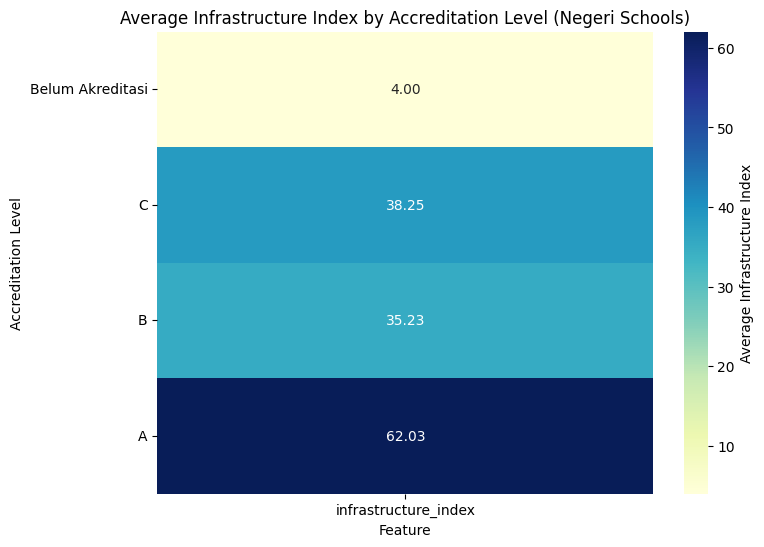

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data for Negeri status only
df_negeri = df[df['status_sekolah'] == 'Negeri'].copy()

# Recalculate infrastructure index for the filtered dataframe
infrastructure_cols = [
    col for col in df_negeri.columns
    if 'ruang' in col or 'laboratorium' in col or 'perpustakaan' in col or 'bangunan' in col
]
df_negeri['infrastructure_index'] = df_negeri[infrastructure_cols].sum(axis=1)

# Handle missing 'akreditasi' values by dropping rows
df_negeri_cleaned = df_negeri.dropna(subset=['akreditasi']).copy()

# Group by 'akreditasi' and calculate the mean 'infrastructure_index'
accreditation_infrastructure_agg = df_negeri_cleaned.groupby('akreditasi')['infrastructure_index'].mean().reset_index()


# 2. Heatmap of accreditation vs. infrastructure
print("\n=== Heatmap of Accreditation vs. Infrastructure Index (Negeri Schools) ===")

# Sort the accreditation levels for better visualization order (optional, adjust as needed)
accreditation_order = ['Belum Akreditasi', 'C', 'B', 'A']
accreditation_infrastructure_agg['akreditasi'] = pd.Categorical(accreditation_infrastructure_agg['akreditasi'], categories=accreditation_order, ordered=True)
accreditation_infrastructure_agg = accreditation_infrastructure_agg.sort_values('akreditasi')


plt.figure(figsize=(8, 6))
sns.heatmap(accreditation_infrastructure_agg.set_index('akreditasi'), annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': 'Average Infrastructure Index'})
plt.title('Average Infrastructure Index by Accreditation Level (Negeri Schools)')
plt.xlabel('Feature')
plt.ylabel('Accreditation Level')
plt.yticks(rotation=0) # Ensure y-axis labels are horizontal
plt.show()


=== Average Teacher-Student Ratio per District (Negeri Schools) ===


/tmp/ipython-input-3170083995.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='kabupaten/kota', y='teacher_student_ratio', data=teacher_student_ratio_district_sorted, palette='viridis')


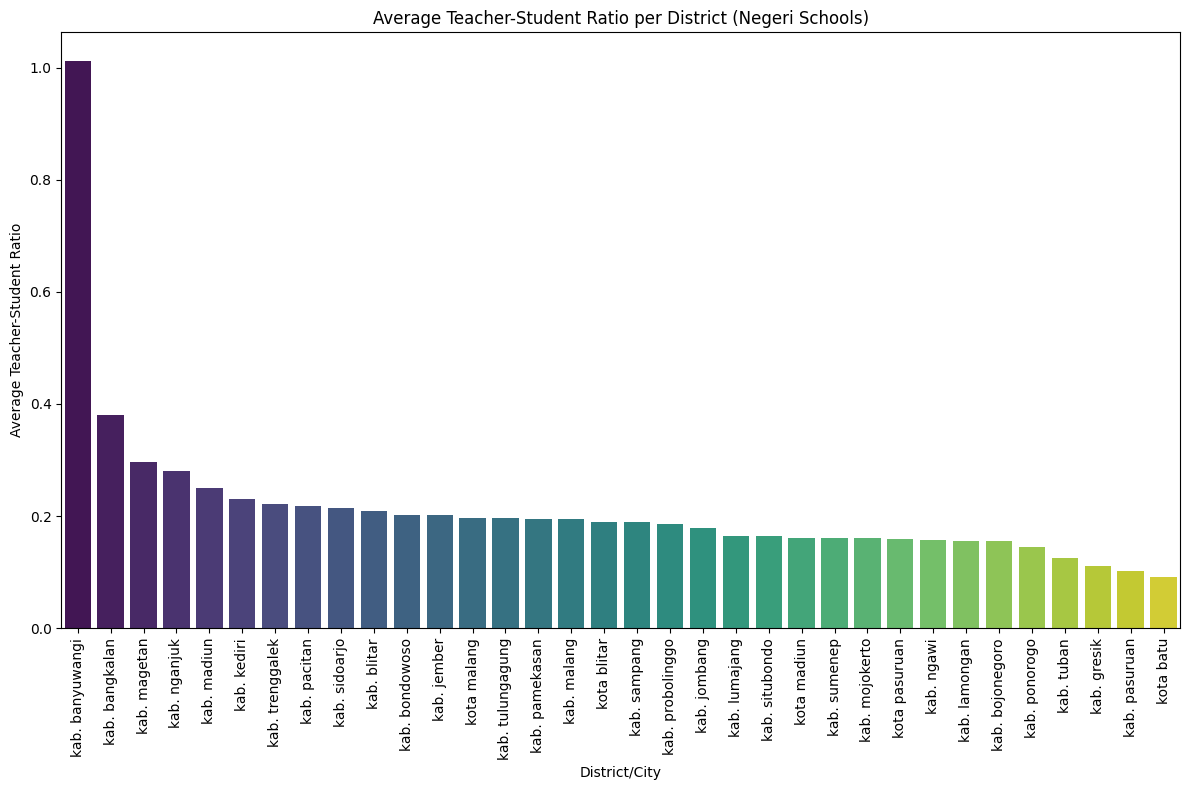

In [47]:
# 3. Bar chart of teacher-student ratio per district
print("\n=== Average Teacher-Student Ratio per District (Negeri Schools) ===")

# Sort the data by teacher_student_ratio for better readability
teacher_student_ratio_district_sorted = teacher_student_ratio_district.sort_values('teacher_student_ratio', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='kabupaten/kota', y='teacher_student_ratio', data=teacher_student_ratio_district_sorted, palette='viridis')
plt.title('Average Teacher-Student Ratio per District (Negeri Schools)')
plt.xlabel('District/City')
plt.ylabel('Average Teacher-Student Ratio')
plt.xticks(rotation=90) # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()


=== Student Gender Distribution (All Schools) ===


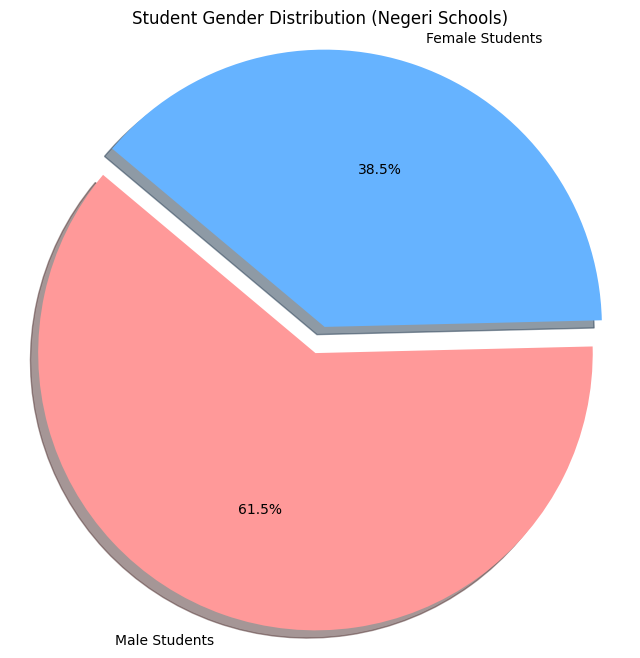

In [48]:
# 4. Pie chart of student gender distribution
print("\n=== Student Gender Distribution (All Schools) ===")

# Filter data for Negeri status only
df_negeri = df[df['status_sekolah'] == 'Negeri'].copy()

# Calculate total male and female students for Negeri schools
total_male_students = df_negeri['pd_laki'].sum()
total_female_students = df_negeri['pd_perempuan'].sum()

labels = ['Male Students', 'Female Students']
sizes = [total_male_students, total_female_students]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)  # explode 1st slice (Male Students)

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)
plt.title('Student Gender Distribution (Negeri Schools)') # Updated title
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()